In [ ]:

!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 9.6MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=cbe6a68d3ae354c166c798129126b34e001981bbae5c6bc20c0337be1cc35355
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


Output streaming akan dipotong hingga 5000 baris terakhir.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different re

5 -9.36608474109665 0.6294236743113695
   Document_No  ...                                               Text
0            0  ...                       [cara, style, celana, boxer]
1            1  ...  [ice, cream, selena, gomez, reaction, nangis, ...
2            2  ...           [kembaran, taehyung, reaction, dynamite]
3            3  ...                    [bagas, main, game, free, fire]
4            4  ...              [stay, gold, reaction, lemah, kalian]
5            5  ...         [how, that, reaction, mau, mampus, ajalah]
6            6  ...                 [bang, ago, treasure, wayo, cover]
7            7  ...                     [nangis, more, more, reaction]
8            8  ...               [secret, number, who, dis, reaction]
9            9  ...            [세계가, 불타버린, can, see, official, teaser]

[10 rows x 5 columns]
Dominant_Topic
0.0    785
1.0    179
2.0    299
3.0    299
4.0    525
dtype: int64


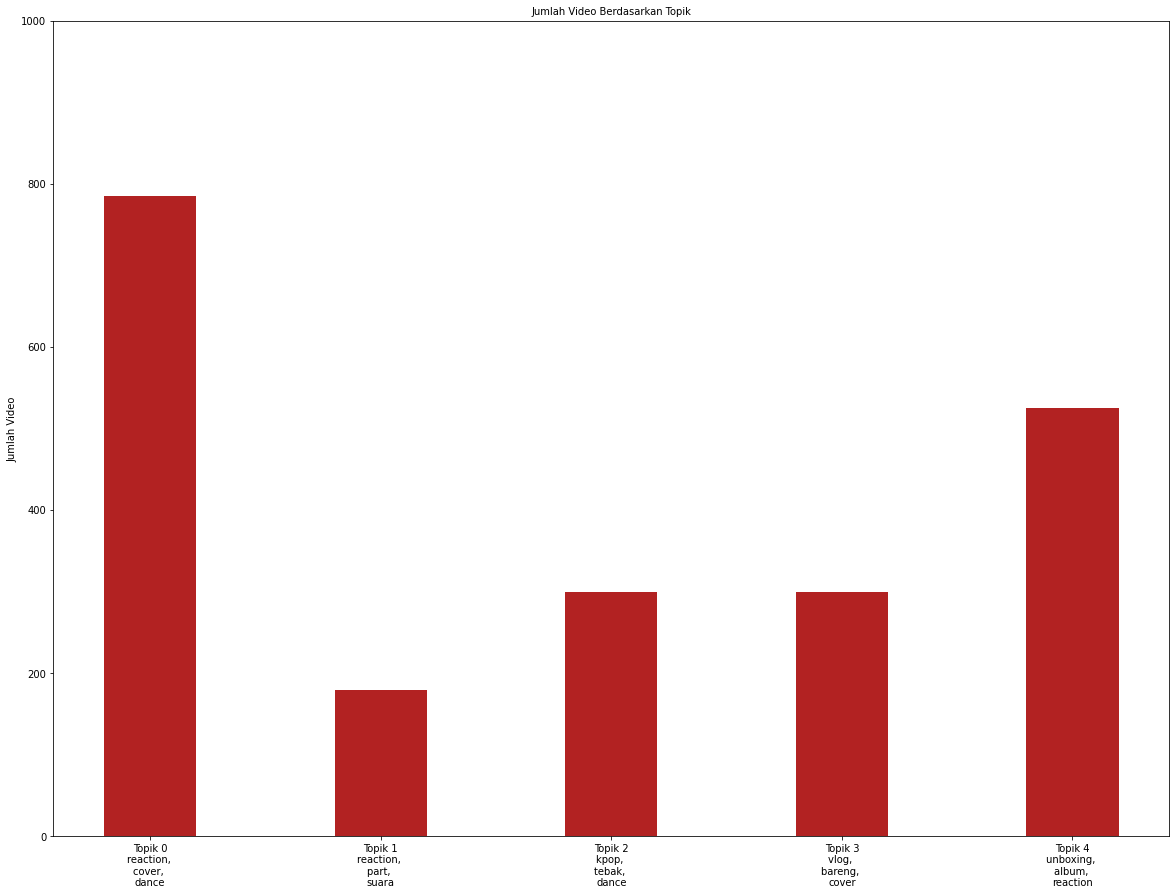

In [ ]:
# -*- coding: utf-8 -*-
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from gensim.models.coherencemodel import CoherenceModel
import re
import pyLDAvis.gensim
import pickle 
import numpy as np, pandas as pd
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

random_state = 0 

doc_set = """
CARA STYLE CELANA BOXER
BLACKPINK  ICE CREAM  WITH SELENA GOMEZ MV REACTION   NANGIS BANGET
KEMBARAN TAEHYUNG REACTION MV BTS   DYNAMITE
BAGAS MAIN GAME FREE FIRE   AGORIVALLL
BTS   STAY GOLD MV REACTION       LEMAH KALIAN
BLACKPINK   HOW YOU LIKE THAT MV REACTION      MAU MAMPUS AJALAH
BANG AGO OF TREASURE    왜요  WAYO   M V  COVER    AGORIVALLL
MO NANGIS     TWICE   MORE   MORE MV REACTION   AGORIVALLL
SECRET NUMBER    WHO DIS   MV REACTION   AGORIVALLL
TXT  투모로우바이투게더   세계가 불타버린 밤  우린     CAN T YOU SEE ME    OFFICIAL TEASER   수빈  AGORIVAL
GES SOM JES TE PLAY DATE TU YU   AGORIVAL
BTS JIMIN   FILTER     COVER FT  REZA DARMAWANGSA
G C F IN HELSINKI
NORMAL VS KPOPERS II KOMPILASI VIDEO INSTAGRAM  AGORIVALLL
KELILING AGENSI TERET TET TET
G  IDLE  OH MY GOD  MV REACTION   OMG MAMPUS AKU
COVID
KEMBARAN KIM TAEHYUNG
JUNGKOOK VS JONGKOOK
BTS   ON COVER DANCE BY AGORIVALLL
มะล่องก่องแก่ง   MALING KINGKONG   COVER BY AGORIVALLL
BTS   ON MV REACTION   HAMIL ONLINE KALIAN
JHOPE   EGO MV REACTION   EGO   AGO
GFRIEND   CROSSROADS MV REACTION   SEMUA PADA GALAU
EVERGLOW   DUN DUN MV REACTION   INI SIH GILA
IM IN LOVE   REZA DARMAWANGSA COVER BY AGORIVALLL
TEBAK LAGU KPOP TER KOCAK      TETEW     FT  GERALDYTAN   ANTHONY YAPUTRA   COPPAMAGZ
SAVE ME  JUNGKOOK SOLO    MMA REMIX
NIKAH SAMA LISA BLACKPINK
TONES AND I   DANCE MONKEY COVER   BAHASA MONYET
LAGU BUCIN   RED VELVET  PSYCHO  MV REACTION
EXO   OBSESSION MV REACTION II BADAS       AGORIVALLL
DOYOUNG  HAECHAN   JAEHYUN｜CINTA LUAR BIASA  ANDMESH KAMALENG    AGORIVALLL
ENTAH APA YANG MERASUKIMU EXE
CHICKEN NOODLE SOUP CHALLENGE  J HOPE FEAT BECKY G
ADIOS VS KILL THIS LOVE   EVERGLOW X BLACKPINK   II WHO S BETTER
KPOP WITH ZERO BUDGET    WINTER BEAR BY V
RED VELVET   UMPAH UMPAH MV REACTION   GA TAHAN
ITZY  ICY  MV REACTION   RYUJIN FRONTAL
강다니엘 KANG DANIEL    뭐해 WHAT ARE YOU UP TO  M V LOW BUDGET PARODY
MEDLEY COVER DANCE   BTS EXO BLACKPINK IKON TXT STARYKIDS
LEE HI    누구 없소  NO ONE   FEAT  B I OF IKON   COVER BY AGORIVAL   GERALDYTAN
JAHIL TANDA SAYANG
WIBU VS KPOPERS
RED VELVET   ZIMZALABIM MV REACTION ❗️❗️❗️   DI SULAP JADI PAK TARNO🤣
JIMIN   PROMISE ASMR
SEDIHNYA IKONIC
BTS DAN EXO MENGUCAPKAN MINAL AIDZIN WAL FAIDIZIN
NORMAL VS KPOPERS    KOMPILASI VIDEO INSTAGRAM  AGORIVALLL
KURSI GAMING TERMURAH DI INDONESIA     VORTEXSERIES
BTS  방탄소년단    MAKE IT RIGHT COVER BY AGORIVALLL
TXT   CAT   DOG DANCE COVER BY  AGORIVALLL FROM INDONESIA
BTS DAN TXT MENGUCAPKAN SELAMAT RAMADHAN
JENKAI LOVE STORY   JENNIE X KAI MOMENTS   T T
BTS   BOY WITH LUV  FEAT  HALSEY DANCE COVER BY  AGORIVALLL FT DMC PROJECT
BOY WITH LUV VS BOY IN LUV II WHO S BETTER
BTS   BOY WITH LUV FEAT HASLEY REACTION II AKU KEMBARAN V
WAY BACK HOME   SHAUN FT  CONOR MAYNARD DANCE IN PUBLIC BY AGORIVALLL FT DMC PROJECT
BLACKPINK   KILL THIS LOVE REACTION II WAH MATI AKU
KPOP IN PUBLIC  TXT  투모로우바이투게더   CROWN  DANCE COVER FROM INDONESIA II  AGORIVALLL
MIRIP MEMBER BOYBAND BTS   EXO DAN TXT
VIDEOCALL SAMA MEMBER BLACKPINK
TXT   CROWN MV REACTION   CUTENESS OVERLOAD   II FX NYA KEREN
NORMAL VS KPOPERS II KOMPILASI VIDEO INSTAGRAMM  II  AGORIVALLL
NORMAL VS KPOPERS    KOMPILASI VIDEO INSTAGRAM  AGORIVALLL
STATION X    CHANYEOL  X SEHUN  WE YOUNG  MV REACTION   SAMBIL MAKAN SAMYANG
IKON   죽겠다 KILLING ME  DANCE COVER   DANCE COVER CONTEST
BTS   IDOL FT NICKI MINAJ MV REACTION   WAHGELASEH PECAH     FEAT FREAK FANBOYS
RED VELVET   POWER UP MV REACTION   AUTO MAKAN BANANA
TWICE   DANCE THE NIGHT AWAY  MV REACTION      FANBOY AUTO MIMISAN
BLACKPINK   DDU DU DDU DU  뚜두뚜두    PARODY MV LOW BUDGET KPOP   AGORIVALLL
BTS  방탄소년단  LOVE YOURSELF 轉 TEAR  SINGULARITY  MV KPOP ZERO BUDGET
J HOPE  DAY DREAM MV WITH ZERO BUDGET
LIVE UNBOXING SHARING ALBUM NCT RESONANCE PT
UNBOXING NCT  RESONANCE ALBUM PT   BAHASA INDONESIA
UNBOXING BLACKPINK THE ALBUM ALL VERSION  BAHASA INDONESIA
UNBOXING MYSTERY BOX KPOP LAGI
REVIEW PRODUK KEEP IT CLEAN BT21    KUY CEGAH VIRUS
LIVE SHARING BLACKPINK THE ALBUM
MV REACTION     NCT U  MAKE A WISH BIRTHDAY SONG   INA REACTION
UNBOXING STRAY KIDS IN LIFE ALBUM STANDARD VERSION  BAHASA INDONESIA
MV REACTION     BLACKPINK  LOVESICK GIRLS   INA REACTION
UNBOXING TREASURE ALBUM CHAPTER TWO I LOVE YOU  BAHASA INDONESIA
SHARING ALBUM STRAY KIDS IN LIFE
SHARING ALBUM TREASURE LAGI
SHARING  ALBUM TREASURE CHAPTER TWO
KPOP PHOTOCARD HAUL    EXO GFRIEND NCT ITZY
UNBOXING TREASURE THE FIRST CHAPTER ONE BOY ALBUM  BAHASA INDONESIA
MV REACTION     TREASURE  I LOVE YOU   INA REACTION
UNBOXING  MYSTERY BOX KPOP    PUAS BANGET
MV REACTION     STRAY KIDS  BACK DOOR   INA REACTION
OBRAL ALBUM PHOTOCARD TREASURE
STRAYKIDS STAY IN PLAYGROUND PHOTOBOOK UNBOXING  BAHASA INDONESIA
BTS MEMORIES  UNBOXING  BAHASA INDONESIA
BLACKPINK  SUMMER DIARY IN SEOUL UNBOXING  BAHASA INDONESIA
UNBOXING MYSTERY BOX KPOP SUPER GEDE   ISINYA BAGUS SEMUA
LIVE SHARING UNBOXING PERINTILAN ALBUM TREASURE
MV REACTION     BLACKPINK WITH SELENA GOMEZ  ICE CREAM   INA REACTION
ITZY NOT SHY ALBUM UNBOXING  BAHASA INDONESIA
UNBOXING MYSTERY BOX LAGI
MV REACTION     BTS  DYNAMITE   INA REACTION
EXO PRESENT GIFT PHOTOBOOK UNBOXING  BAHASA INDONESIA
ITZY   NOT SHY DANCE COVER PARODY
UNBOXING REVIEW BONEKA BTS DARI RUNA COO   GEMES BANGET WOY
MV REACTION     ITZY  NOT SHY   INA REACTION
KANG DANIEL 2ND MINI ALBUM MAGENTA UNBOXING  BAHASA INDONESIA
MV REACTION     SUPERM     INA REACTION
IRENE SEULGI ALBUM MONSTER UNBOXING  BAHASA INDONESIA
ATEEZ ZERO FEVER PART  ALBUM UNBOXING  BAHASA INDONESIA
GFRIEND ALBUM SONG OF THE SIRENS UNBOXING  BAHASA INDONESIA
MV REACTION     TREASURE  BOY  INA REACTION
SHARING BLACKPINK ALBUM HOW YOU LIKE THAT
TOUR FAKULTAS HUKUM UNIVERSITAS SURYAKANCANA CIANJUR
MV REACTION G IDLE  DUMDI DUMDI    KANG DANIEL  WHO YOU ARE   INA REACTION
REVIEW TOTEBAG DAN BAJU BT21   LUCU PARAH
ITZY OFFICIAL LIGHT RING UNBOXING   REVIEW  BAHASA INDONESIA
MV REACTION     SOMI  WHAT YOU WAITING FOR   INA REACTION
BLACKPINK ALBUM SPECIAL EDITION HOW YOU LIKE THAT UNBOXING  BAHASA INDONESIA
EXO SC THE 1ST ALBUM  BILLION VIEWS UNBOXING  BAHASA INDONESIA
AB6IX EP ALBUM VOL  VIVID UNBOXING  BAHASA INDONESIA
BAEKHYUN MINI ALBUM VOL  DELIGHT CHEMISTRY VERSION UNBOXING  BAHASA INDONESIA
LAGI LAGI SHARING ALBUM SKZ GO
MV REACTION   GFRIEND  APPLE    EXO SC   BILLION VIEWS   INA REACTION
BUKAIN PERINTILAN ALBUM STRAY KIDS LIVE GO
MV REACTION     IRENE   SEULGI  MONSTER   INA REACTION
BLACKPINK   HOW YOU LIKE THAT SHORT DANCE COVER
UNBOXING DAN REVIEW PARFUME BOX BTS
STRAY KIDS ALBUM VOL  GO LIVE UNBOXING  BAHASA INDONESIA
MV REACTION     BLACKPINK  HOW YOU LIKE THAT   INA REACTION
WAYV ALBUM VOL  AWAKEN THE WORLD UNBOXING  BAHASA INDONESIA
STRAY KIDS ALBUM VOL  GO LIVE LIMITED EDITION UNBOXING  BAHASA INDONESIA
IZ ONE MINI ALBUM VOL  ONEIRIC DIARY 3D VERSION UNBOXING  BAHASA INDONESIA
MV REACTION     SEVENTEEN  LEFT   RIGHT   INA REACTION
IZ ONE MINI ALBUM VOL  ONEIRIC DIARY UNBOXING  BAHASA INDONESIA
MV REACTION     WAYV  TURN BACK TIME KOREAN VER   INA REACTION
GIVEAWAY  UNBOXING SURPRISE BOX    KIRA KIRA DAPET APA AJA YA
MV REACTION     STRAY KIDS  GOD S MENU   INA REACTION
MV REACTION     IZ ONE  SECRET STORY OF THE SWAN   INA REACTION
TWICE THE 9TH MINI ALBUM MORE AND MORE UNBOXING  BAHASA INDONESIA
TWICE   MORE AND MORE  SHORT DANCE COVER
MINI OBRAL BARANG OFFICIAL
MV REACTION     TXT  PUMA   INA REACTION
SECRET NUMBER WHO DIS ALBUM UNBOXING  BAHASA INDONESIA
NCT DREAM ALBUM RELOAD UNBOXING  BAHASA INDONESIA
NCT NEO ZONE THE FINAL ROUND PUNCH ALBUM UNBOXING  BAHASA INDONESIA
MV REACTION     TWICE  MORE   MORE   INA REACTION
TXT THE DREAM CHAPTER ETERNITY UNBOXING  BAHASA INDONESIA
AUDIO REACTION   LADY GAGA X BLACKPINK  SOUR CANDY   INA REACTION
MV REACTION     NCT   PUNCH   INA REACTION
MV REACTION     SECRET NUMBER  WHO DIS    INA REACTION
MV REACTION     TXT  CAN T YOU SEE ME   INA REACTION
THE SIMS  EP    CHANYEOL NYUCI  SEOKJIN MASAK  GUE TIDUR HAHAHA       DEKOR KAMAR GUE
THE SIMS  EP    GINILOH ISI RUMAH KELUARGA IDOL
OFFICIAL LIGHTSTICK STRAY KIDS UNBOXING REVIEW  BAHASA INDONESIA
THE SIMS  EP    VLOG PINDAHAN KELUARGA IDOL
GIVEAWAY  DEKOR TEMBOK KAMAR DAN JURNAL KPOP
MV REACTION     NCT DREAM  RIDIN   INA REACTION
BTS OFFICIAL LIGHTSTICK SPECIAL EDITION UNBOXING MAP OF THE SOUL  BAHASA INDONESIA
TUTORIAL MAKE UP ALA EONNI NOONA KOREA
UNBOXING PAKET KPOP MISTERIUS
G IDLE 3RD MINI ALBUM I TRUST UNBOXING  BAHASA INDONESIA
BTS 5TH MUSTER MAGIC SHOP UNBOXING  BAHASA INDONESIA
MV REACTION     GOT7  NOT BY THE MOON   INA REACTION
NGAKAK BGT  MAIN GAME TEBAK IDOL KPOP DARI MATA HIDUNG MULUTNYA AJA
IZONE SECRET DIARY SPRING COLLECTION  PHOTOBOOK UNBOXING  BAHASA INDONESIA
TERNYATA SEOKJIN PELIT YA
SUHO THE 1ST MINI ALBUM SELF POTRAIT UNBOXING  BAHASA INDONESIA
UNBOXING GAK JELAS SAMBIL BELAJAR DARI BUKU BAHASA KOREA CEUNAH
LIVE SING COVER PARODY   LAUV FEAT BTS  WHO
NCT  THE 2ND ALBUM NEO ZONE T VERSION UNBOXING  BAHASA INDONESIA
UNBOXING MYSTERY BOX KPOP GEDE BANGET
DIY AESTHETIC KPOP CASE COLLECTION     IPHONE  MINT
GUESS  IDOLS IN  FACE   AUTO BEGO JILID  HAHAHA
ITZY MINI ALBUM VOL  ITZ ME UNBOXING  BAHASA INDONESIA
MY SKINCARE ROUTINE AS A FANBOY    ELVICTO REVIEW  SKINCARE KHUSUS COWOK
KPOP TOTEBAG HAUL MURAH BANGET DAN AESTHETIC
NCT  2ND ALBUM NEO ZONE UNBOXING  BAHASA INDONESIA
HALO
BLACKPINK S  WELCOMING COLLECTION UNBOXING  BAHASA INDONESIA
GIVEAWAY  REVIEW PRODUK TERBARU DARI ATEAKPOP BTS MOTS  EDITION
MV REACTION     ITZY  WANNABE   INA REACTION
TUTORIAL CAT RAMBUT MINT SENDIRI DI RUMAH ALA IDOL KOREA
BERBURU PHOTOCARD DI ALBUM BTS MOTS
MV REACTION     NCT  “KICK IT”  INA REACTION
MV REACTION     BTS  BLACK SWAN   INA REACTION
ASK MY TOP  KPOP EDITION
UNBOXING BTS MAP OF THE SOUL  ALBUM SET     BAHASA INDONESIA
MV REACTION     BTS  ON   INA REACTION  OFFICIAL MV
AUTO BEGO      GUESS THE REVERSED KPOP SONG
UNBOXING REVIEW TXT OFFICIAL LIGHTSTICK     BAHASA INDONESIA
BEHIND THE SCENE KPOP REWIND  INDONESIA PART
NCT DREAM SEASON GREETING  UNBOXING  BAHASA INDONESIA
MY KPOP FREEBIES COLLECTION     UNOFFICIAL KPOP STUFF
IZ ONE BLOOM IZ ALBUM UNBOXING  BAHASA INDONESIA
BEHIND THE SCENE KPOP REWIND  INDONESIA PART
MV REACTION     BTS  ON   INA REACTION    GIVEAWAY ALBUM BTS MOTS7
IKON 3RD MINI ALBUM I DECIDE UNBOXING  BAHASA INDONESIA
GIVEAWAY  UNBOXING MYSTERY BOX KPOP MERCH
BACAIN PENGALAMAN TERBURUK JADI KPOPERS
MV REACTION     IZ ONE  FIESTA   INA REACTION
BTS WINTER PACKAGE  IN HELSINKI UNBOXING  BAHASA INDONESIA
DANCE COVER PARODY     EVERGLOW  DUN DUN
GFRIEND LABYRINTH ALBUM UNBOXING  BAHASA INDONESIA
MV REACTION     IKON  DIVE   INA REACTION
GIVEAWAY  AUTO KALAP DI TOKO MERCH KPOP MURAHHHHHH ATEAKPOP
MV REACTION     EVERGLOW  DUN DUN   INA REACTION
MV REACTION     GFRIEND  CROSSROADS   INA REACTION
BEHIND THE SCENE KPOP REWIND INDONESIA   PART
STRAY KIDS MINI ALBUM CLE LEVANTER UNBOXING  BAHASA INDONESIA
OBRAL OFFICIAL NCT TWICE BTS
TWICE SEASON GREETING  UNBOXING  BAHASA INDONESIA
NCT  SEASON GREETING  UNBXOING  BAHASA INDONESIA
BTS DVD SPEAK YOURSELF SAO PAULO UNBOXING BAHASA INDONESIA
X1 FIRST OFFICIAL FANCLUB ONE IT UNBOXING  BAHASA INDONESIA
RED VELVET THE REVE FESTIVAL FINALE UNBOXING  BAHASA INDONESIA
TIPS MASUK LINE DEBUT DI PRODUCE  MONTHLY IDOL
DANCE COVER   PSYCHO RED VELVET
SEASON GRETING BTS  UNBOXING  INA
TUTORIAL DASAR MAIN GAME MONTHLY IDOL
TEORI MV RED VELVET PSYCHO  INA
EXO SEASON GREETING  UNBOXING  BAHASA INDONESIA
GFRIEND  SEASON GREETING UNBOXING  BAHASA INDONESIA
MV REACTION     RED VELVET  PSYCHO   INA REACTION
VLOG PERTAMA KALI JADI MC DI EVENT KPOP
VLOG SEHARIAN SERBA BTS DAN BT21   SERU PARAH ASLI
EXO 6TH ALBUM OBSESSION UNBOXING  BAHASA INDONESIA
BTS GLOBAL OFFICIAL FANCLUB 6TH ARMY MEMBERSHIP KIT UNBOXING  BAHASA INDONESIA
MV REACTION    EXO  OBSESSION   INA REACTION
VLOG EXO PLANET  EXPLORATION IN JAKARTA
JAM MAKAN YANG WARNA MERAH   TERNYATA SUSAH
MONSTA X MINI ALBUM FOLLOW FIND YOU UNBOXING  BAHASA INDONESIA
TAEYEON THE 2ND ALBUM PURPOSE UNBOXING  BAHASA INDONESIA
GOT7 MINI ALBUM CALL MY NAME UNBOXING  BAHASA INDONESIA
SUPERM 1ST MINI JOPPING KOREAN VERSION ALBUM UNBOXING  BAHASA INDONESIA
VLOG GFRIEND X SHOPEE IN JAKARTA PECAHHHHH ABIS
VLOG KPOP FESTIVAL PERTAMA DI CIANJUR SERU BANGET
MV REACTION     GFRIEND  FALLIN  LIGHT   INA REACTION
TXT 1ST ALBUM THE DREAM CHAPTER MAGIC UNBOXING  BAHASA INDONESIA
AB6IX 1ST ALBUM 6IXENSE UNBOXING  BAHASA INDONESIA
SEVENTEN AN ODE ALBUM UNBOXING   GIVEAWAY TIKET KONSER SEVENTEEN  INA
MV REACTION MASAL   DAY6  SWEET CHAOS    WINNER  SOSO   INA REACTION
MV REACTION     TXT  RUN AWAY   INA REACTION
REVIEW CGV X BT21 TUMBLR REGULAR VERSION ALL CHARACTERS   GIVEAWAY
BTS SUMMER PACKAGE  IN KOREA UNBOXING  BAHASA INDONESIA
BLACKPINK SUMMER DIARY IN HAWAII DVD  UNBOXING  BAHASA INDONESIA
REACTION TEASER ANIMASI FANFICTION WATTPAD SCHOOL GHOST
DIY     SATU TEMBOK FULL ISINYA BTS SEMUAAAA
DANCE COVER PARODY TWICE    FEEL SPECIAL
MV REACTION     STRAY KIDS  DOUBLE KNOT   INA REACTION
MV REACTION     AB6IX  BLIND FOR LOVE   INA REACTION
TWICE THE 8TH MINI ALBUM FEEL SPECIAL UNBOXING INA BERSAMA PARA MAKHLUK RUSUH
BELANJA ALBUM DI KOKAS
REVIEW PARFUME KIM YOHAN X1
MV REACTION     SUPER M  JOPPING   INA REACTION
UNBOXING DAN REVIEW VT COSMETICS X BTS HAND CREAM
EXO 2ND ALBUM REPACKAGE LOVE ME RIGHT UNBOXING  BAHASA INDONESIA
DIKIRIMIN PAKET SAMA VT COSMETICS X BTS    CICA SKINCARE  UNBOXING
DIY     PHONE CASE BTS BT21 LUCU BANGETTTT
MV REACTION     TWICE  FEEL SPECIAL   INA REACTION
MERCH BTS   BT21 MURAH TAPI GEMES PARAH
MV REACTION     SEVENTEEN  FEAR
UNBOXING  ALBUM X1 QUANTUM LEAP   DAPET PHOTOCARD SIAPA AJA YA
DIY     PASANG RAK BARU BUAT TEMPAT LIGHTSTICK
KIHNO X1   ‘비상   QUANTUM LEAP’   1ST MINI ALBUM UNBOXING  BAHASA INDONESIA
DIY     PASANG WIRE GRID KPOP
X1 엑스원 1ST MINI ALBUM 비상  QUANTUM LEAP UNBOXING  BAHASA INDONESIA
DIY     SOK SOKAN DEKOR EXO LIGHTSTICK VER
RED VELVET THE REVE FESTIVAL DAY  UMPAH UMPAH ALBUM UNBOXING  BAHASA INDONESIA
LOVE ALARM SHORT DRAMA PARODY
NCT127 BACK TO SCHOOL KIT JAEHYUN VER UNBOXING  BAHASA INDONESIA
MV REACTION     X1  FLASH   INA REACTION
VLOG     GO GO GFRIEND IN JAKARTA
BLACKPINK  IN YOUR AREA TOUR SEOUL DVD UNBOXING  BAHASA INDONESIA
MV REACTION     RED VELVET  UMPAH UMPAH   INA REACTION
BTS MEMORIES OF  UNBOXING  BAHASA INDONESIA
ITZY   ICY SHORT COVER
ITZY ALBUM IT Z ICY UNBOXING  BAHASA INDONESIA
NCT DREAM WE BOOM ALBUM  BOOM VERSION  UNBOXING  BAHASA INDONESIA
NCT DREAM WE BOOM ALBUM  WE VERSION  UNBOXING  BAHASA INDONESIA
NGOBROL YUK     DANIEL JIHYO JADIAN  INI PENDAPAT GUE SAMBIL UNBOXING ALBUMNYA KANG DANIEL
BAEKHYUN 1ST MINI ALBUM CITY LIGHTS UNBOXING  BAHASA INDONESIA
MV REACTION MASAL   ITZY   ICY  NCT DREAM   BOOM  SEVENTEEN   HIT
BUKA PAKETAN ALBUM KPOP
LIVE  NGOBROL SAMBIL UNBOXING ALBUM
NGEHALU YUK
MV REACTION     CIX  MOVIE STAR
EXO SC 1ST MINI ALBUM WHAT A LIFE UNBOXING  BAHASA INDONESIA
ATEEZ 3RD MINI ALBUM TREASURE EP  ONE TO ALL ILLUSION VERSION UNBOXING  BAHASA INDONESIA
GFRIEND 7TH MINI ALBUM FEVER SEASON UNBOXING  BAHASA INDONESIA
EXO OFFICIAL LIGHTSTICK VER  UNBOXING  BAHASA INDONESIA
BTS WORLD ORIGINAL SOUNDTRACK UNBOXING  BAHASA INDONESIA
KIM JAEHWAN ANOTHER ALBUM UNBOXING  BAHASA INDONESIA
EXO K MAMA THE 1ST MINI ALBUM UNBOXING  BAHASA INDONESIA
LEE HI MINI ALBUM 24C UNBOXING  BAHASA INDONESIA
STRAY KIDS SPECIAL ALBUM CLE  YELLOW WOOD LIMITED EDITION UNBOXING BAHASA INDONESIA
STRAY KIDS SPECIAL ALBUM CLE   YELLOW WOOD UNBOXING  BAHASA INDONESIA
GFRIEND   FEVER
RED VELVET MINI ALBUM VOL  THE REVE FESTIVAL DAY   BAHASA INDONESIA
BUKAIN PAKETAN KPOP
NCT127 SUMMER VACATION  UNBOXING  BAHASA INDONESIA
NCT DREAM SUMMER VACATION KIT  UNBOXING  BAHASA INDONESIA
WAYV SUMMER VACATION KIT  UNBOXING  BAHASA INDONESIA
BTS WORLD TOUR LOVE YOURSELF DVD EUROPE UNBOXING  BAHASA INDONESIA
BTS WORLD TOUR LOVE YOURSELF DVD NEW YORK UNBOXING  BAHASA INDONESIA
KPOP ALBUM HAUL   UNBOXING
RELA JAUH JAUH DEMI KE TOKO ALBUM
SOMI   BIRTHDAY
ADA TOKO ALBUM DI MALL TAMAN ANGGREK JAKARTA
TRY NOT TO NGEGAS     FEAT  GERALDYTAN CHANNEL
MV REACTION     RED VELVET  ZIMZALABIM   INA REACTION
MV REACTION     STRAY KIDS  SIDE EFFECTS   INA REACTION
GFRIEND OFFICIAL LIGHTSTICK VER  BAMHANEULBONG UNBOXING  BAHASA INDONESIA
NCT127 THE 4TH MINI ALBUM SUPERHUMAN UNBOXING  BAHASA INDONESIA
MV REACTION     IZ ONE    BUENOS AIRES
MV REACTION     SOMI  BIRTHDAY
MV REACTION     TWICE  HAPPY HAPPY
MV REACTION     TWICE  BREAKTHROUGH
MV REACTION     NCT DREAM X HRVY  DON T NEED YOUR LOVE
MV REACTION     FROMIS   FUN
SUDAH DITUTUP  MINI GIVEAWAY
AB6IX EP ALBUM VOL   B COMPLETE  UNBOXING  BAHASA INDONESIA
WINNER 2ND MINI ALBUM  WE  UNBOXING  BAHASA INDONESIA
GOT7 ALBUM SPINNING TOP UNBOXING  BAHASA INDONESIA
MV REACTION     SEVENTEEN  HAPPY ENDING   INA REACTION
EXID 5TH MINI ALBUM ME AND YOU UNBOXING  BAHASA INDONESIA
MV REACTION     NCT   SUPERHUMAN   INA REACTION
CERITA BUAT DAPETIN SILVER PLAY BUTTON    UNBOXING  YOUTUBECREATORAWARDS
MV REACTION     AB6IX  BREATHE   INA REACTION
UNBOXING FUNKO POP  BTS ALL MEMBER
MV REACTION     GOT7  ECLIPSE   INA REACTION
TWICE OFFICIAL LIGHTSTICK VER  CANDYBONG Z UNBOXING  BAHASA INDONESIA
WINNER OFFICIAL LIGHTSTICK VER  UNBOXING  BAHASA INDONESIA
WANNA ONE 1ST MINI ALBUM TO BE ONE PINK VERSION UNBOXING  BAHASA INDONESIA
MV REACTION     WINNER  AH YEAH   INA REACTION
NGEMIL
TWICE 7TH MINI ALBUM FANCY YOU UNBOXING  BAHASA INDONESIA
DANCE COVER PARODY     TWICE  FANCY
BAE JIN YOUNG 1ST SINGLE ALBUM HARD TO SAY GOODBYE UNBOXING  BAHASA INDONESIA
BLACKPINK 2ND MINI ALBUM KILL THIS LOVE UNBOXING  BAHASA INDONESIA
MV REACTION     BAE JIN YOUNG  HARD TO SAY GOODBYE   INA REACTION
MV REACTION     CHANYEOL  SSFW   INA REACTION
MV REACTION     TXT  CAT   DOG   INA REACTION
UNBOXING BTS ALBUM MAP OF THE SOUL PERSONA  BAHASA INDONESIA
MV REACTION     TWICE  FANCY   INA REACTION
AKHIRNYA Q A
UNBOXING PRODUK PRODUK CELEBON
IZ ONE OFFICIAL LIGHTSTICK UNBOXING  BAHASA INDONESIA
MV REACTION     BTS  BOY WITH LUV   INA REACTION
DANCE COVER PARODY      BLACKPINK  KILL THIS LOVE
BTS LOVE YOURSELF TOUR IN SEOUL DVD UNBOXING  BAHASA INDONESIA
IZ ONE 2ND MINI ALBUM HEART IZ UNBOXING  BAHASA INDONESIA
MV REACTION     TXT  BLUE ORANGEADE
VLOG   GFRIEND X CELEBON FANMEETUP IN JAKARTA
REVIEW NOVEL SCHOOL GHOST   SEREM GILAK TAPI SERU
MV REACTION     BLACKPINK  KILL THIS LOVE   INA REACTION
BERKAT VIDEO INI GUE BISA FOTO BARENG SAMA GFRIEND
STRAY KIDS MINI ALBUM CLE    MIROH LIMITED EDITION UNBOXING  BAHASA INDONESIA
MV REACTION     IZ ONE  VIOLETA
STRAY KIDS MINI ALBUM CLE    MIROH UNBOXING  BAHASA INDONESIA
NGEMIL
WOOSEOK X KUANLIN 1ST MINI ALBUM  UNBOXING  BAHASA INDONESIA
BOBBY 1ST SOLO ALBUM LOVE AND FALL UNBOXING  BAHASA INDONESIA
VLOG   PARK BO GUM ASIA TOUR GOOD DAY IN JAKARTA   PRESSCON
MV REACTION     STRAY KIDS  MIROH
REVIEW BTS THE NOTES
MV REACTION     EVERGLOW  BON BON CHOCOLAT
MV REACTION     NCT   WAKEY WAKEY
HA SUNG WOON 1ST MINI ALBUM MY MOMENT UNBOXING  BAHASA INDONESIA
DANCE COVER PARODY     TXT  CROWN
MV REACTION     MAMAMOO  GOGOBEBE
MV REACTION     WOOSEOK X KUANLIN  I M A STAR
JUS2 MINI ALBUM FOCUS UNBOXING  BAHASA INDONESIA
NGEMIL
PRANK CALL YUNITA PAKE LIRIK LAGU KOREA TAPI VERSI INDONESIA
G IDLE 2ND MINI ALBUM I MADE UNBOXING  BAHASA INDONESIA
TXT ALBUM THE DREAM CHAPTER STAR UNBOXING BAHASA INDONESIA
NGEMIL
GOT7 EYES ON YOU WORLD TOUR DVD UNBOXING  BAHASA INDONESIA
TXT   CROWN  SHORT COVER
MV REACTION     TXT  CROWN
MV REACTION     JUS2  FOCUS ON ME
MV REACTION     GFRIEND  FLOWER
MONSTA X WE ARE HERE 2ND ALBUM TAKE  UNBOXING  BAHASA INDONESIA
MV REACTION     G IDLE  SENORITA
THIRD GIVEAWAY   ADA  HADIAH UNTUK  ORANG PEMENANG
BLACKPINK  WELCOMING COLLECTION UNBOXING  BAHASA INDONESIA
UNBOXING CD PLAYER KPOP KEKINIAN
JIMIN   PROMISE  COVER
MV REACTION     MONSTA X  ALLIGATOR
DANCE COVER PARODY     ITZY  DALLA DALLA
MV REACTION     ITZY  DALLA DALLA
Q A PERTAMA WITH GENG DUGONG
KPOP CHALLENGE     WHISPER CHALLENGE
DANCE COVER PARODY     LISA  SWALLA
EXO   LOVE SHOT  SHORT COVER
WINNER SEASON GREETING  UNBOXING  BAHASA INDONESIA
KPOP CHALLENGE     JAMMING IN PUBLIC
NGEMIL
STRAYKIDS UNVEIL TOUR IN JAKARTA
PERBEDAAN KONBAT VERSI  DAN VERSI
SEVENTEEN ALBUM YOU MADE MY DAWN UNBOXING PART  DAWN VERSION
SEVENTEEN ALBUM YOU MADE MY DAWN UNBOXING PART   ETERNAL SUNSHINE VERSION
SEVENTEEN ALBUM YOU MADE MY DAWN UNBOXING PART   BEFORE DAWN VERSION
VLOG     STRAY KIDS UNVEIL TOUR IN JAKARTA
NGEMIL
IKON KONBAT LIGHTSTICK VER  UNBOXING  BAHASA INDONESIA
DANCE COVER PARODY     GFRIEND  SUNRISE
GFRIEND THE 2ND ALBUM TIME FOR US UNBOXING PART   MIDNIGHT VERSION
GFRIEND THE 2ND ALBUM TIME FOR US UNBOXING PART   DAYBREAK VERSION
GFRIEND THE 2ND ALBUM TIME FOR US UNBOXING PART   DAYTIME VERSION
MV REACTION     SEVENTEEN  HOME
VLOG BLACKPINK TOUR IN YOUR AREA JAKARTA PART
VLOG     BLACKPINK IN YOUR AREA JAKARTA PART
IKON NEW KIDS REPACKAGE ALBUM UNBOXING PART II  BLACK VERSION
IKON NEW KIDS REPACKAGE ALBUM UNBOXING PART I  RED VERSION
MV REACTION     WAYV  REGULAR
MV REACTION     GFRIEND  SUNRISE    PARAH HIGH NOTE DIMANA MANA
BTS SEASON GREETING  UNBOXING  BAHASA INDONESIA
WANNA ONE PHOTO ESSAY SEASON  UNBOXING  BAHASA INDONESIA
SEVENTEEN SEASON GREETING  UNBOXING  BAHASA INDONESIA
MV REACTION     IKON  I M OK
MV REACTION     RED VELVET  SAPPY
TWICE SEASON GREETING  UNBOXING  BAHASA INDONESIA
WANNA ONE SEASON GREETING  UNBOXING  BAHASA INDONESIA
DANCE COVER PARODY     EXO  LOVE SHOT  DANGDUT VERSION
DANCE COVER PARODY     EXO  LOVE SHOT
EXO DON T MESS UP MY TEMPO VIVACE VERSION ALBUM UNBOXING  BAHASA INDONESIA
VIDEO CALL SAMA BAEJINYOUNG
FAIL KPOP RANDOM DANCE
TWICE THE 3RD SPECIAL ALBUM THE YEAR OF YES UNBOXING  BAHASA INDONESIA
K POP YOUTUBE REWIND INDONESIA   HIT U WITH MY TEMPO REACTION
DAY6 SEASON GREETING  UNBOXING  BAHASA INDONESIA
DANCE COVER PARODY     IZ ONE  LA VI EN ROSE
EXO THE 5TH REPACKAGE ALBUM LOVE SHOT UNBOXING  BAHASA INDONESIA
MV REACTION     WINNER  MILLIONS
RED VELVET SEASON GREETING  UNBOXING  BAHASA INDONESIA
DAY6 ALBUM REMEMBER US YOUTH PART  UNBOXING  BAHASA INDONESIA
NCT SEASON GREETING  UNBOXING  BAHASA INDONESIA
EXO SEASON GREETING  UNBOXING  BAHASA INDONESIA
DANCE COVER PARODY     TWICE  YES OR YES
MV REACTION     EXO  LOVE SHOT
MV REACTION     TWICE  THE BEST THING I EVER DID
GOT7 PRESENT YOU   ME UNBOXING  BAHASA INDONESIA
VLOG     MUKBANG MAKANAN KOREA DI MUJIGAE
MINO FIRST SOLO ALBUM XX UNBOXING  BAHASA INDONESIA
DANCE COVER PARODY     JENNIE  SOLO
RED VELVET REALLY BAD BOY ALBUM UNBOXING  BAHASA INDONESIA
NCT  REGULATE ALBUM UNBOXING  BAHASA INDONESIA
MV REACTION     GOT7  MIRACLE
WANNA ONE POWER OF DESTINY KIHNO UNBOXING  BAHASA INDONESIA
MV REACTION     RED VELVET  RBB
MV REACTION     MINO  FIANCE
NGEMIL     TTEOKBOKKI   GIMBAB DARI K MART
WANNA ONE POWER OF DESTINY ALBUM UNBOXING  BAHASA INDONESIA
JENNIE SOLO PHOTOBOOK ALBUM UNBOXING  BAHASA INDONESIA
MV REACTION     NCT   SIMON SAYS
WANNA ONE WORLD TOUR IN SEOUL KIHNO DVD UNBOXING  BAHASA INDONESIA
VLOG     IKON CONTINUE TOUR IN JAKARTA
MV REACTION     WANNA ONE  SPRING BREEZE
TWICE THE 6TH MINI ALBUM YES OR YES UNBOXING  BAHASA INDONESIA
MV REACTION     JENNIE  SOLO
EXO DON T MESS UP MY TEMPO ALBUM UNBOXING  BAHASA INDONESIA
BTS 4TH MUSTER HAPPY EVER AFTER DVD UNBOXING  BAHASA INDONESIA
MV REACTION     BTS  防弾少年団   AIRPLANE PT   JAPANESE VERSION
IZ ONE MINI ALBUM VOL  ALBUM COLOR IZ UNBOXING  BAHASA INDONESIA
MV REACTION     TWICE  YES OR YES
BTS MEMORIES  UNBOXING BAHASA INDONESIA
MV REACTION     EXO  TEMPO
STRAY KIDS OFFICIAL GOODS  UNVEIL  LIGHTSTICK UNBOXING  BAHASA INDONESIA
MV REACTION     IZ ONE  LA VI EN ROSE
STRAY KIDS ALBUM I AM YOU UNBOXING  BAHASA INDONESIA
GOT7 OFFICIAL LIGHTSTICK AHGABONG VER  UNBOXING  BAHASA INDONESIA
REVIEW WDRESSROOM PARFUME    WANGI BANGET DONG
WANNA ONE WORLD TOUR IN SEOUL DVD UNBOXING  BAHASA INDONESIA
BTS 3RD MUSTER ARMY ZIP DVD UNBOXING BAHASA INDONESIA
MV REACTION     STRAY KIDS  I AM YOU
BTS WINGS CONCEPT BOOK UNBOXING  BAHASA INDONESIA
BTS SUMMER PACKAGE  UNBOXING  BAHASA INDONESIA
NCT127 ALBUM REGULAR IRREGULAR UNBOXING  BAHASA INDONESIA
SUPER JUNIOR SPECIAL MINI ALBUM ONE MORE TIME UNBOXING  BAHASA INDONESIA
BTS SEASON GREETING  UNBOXING  BAHASA INDONESIA
IKON NEW KIDS THE FINAL UNBOXING  BAHASA INDONESIA
BTS THE WINGS TOUR LIVE TRILOGY EPISODE  IN SEOUL UNBOXING  BAHASA INDONESIA
BTS 1ST MINI ALBUM O RUL8   UNBOXING  BAHASA INDONESIA
BTS 1ST SINGLE ALBUM  COOL  SKOOL UNBOXING  BAHASA INDONESIA
BTS 2ND STUDIO ALBUM WINGS ALL VERSION UNBOXING  BAHASA INDONESIA
MV REACTION     IKON  GOODBYE ROAD
NEWKIDD02 SINGLE ALBUM BOY BOY BOY UNBOXING  BAHASA INDONESIA
MV REACTION      STATION X   슬기 SEULGI X신비 여자친구 X청하X소연  WOW THING
OST  MY ID IS GANGNAM BEAUTY ALBUM UNBOXING  BAHASA INDONESIA
GOT7 3RD ALBUM PRESENT YOU UNBOXING  BAHASA INDONESIA
PENTAGON 7TH MINI ALBUM THUMBS UP  UNBOXING  BAHASA INDONESIA
SNSD OH  GG  LIL TOUCH  KIHNO ALBUM UNBOXING  BAHASA INDONESIA
WANNA ONE X SUMMER PACKAGE  UNBOXING  BAHASA INDONESIA
MV REACTION     GFRIEND  MEMORIA
BTS GLOBAL OFFICIAL FANCLUB 5TH ARMY UNBOXING  BAHASA INDONESIA
MV REACTION     GOT7  LULLABY
MV REACTION      STATION X   찬열  CHANYEOL  X 세훈  SEHUN   WE YOUNG
NCT DREAM 2ND MINI ALBUM WE GO UP UNBOXING  BAHASA INDONESIA
MV REACTION     PENTAGON  NAUGHTY BOY
IKON  PRIVATE STAGE PHOTOBOOK UNBOXING  BAHASA INDONESIA
IKON SUMMERTIME IN HAWAII UNBOXING  BAHASA INDONESIA
MV REACTION     BTS  방탄소년단   IDOL  FEAT  NICKI MINAJ
MV REACTION     GIRLS  GENERATION OH GG 소녀시대 OH GG  몰랐니  LIL  TOUCH
MV REACTION     PENTAGON  SHINE  JAPANESE VERSION
DANCE PRACTICE REACTION   BTS  IDOL
CHALLENGE     BEEN BOOZLED CHALLENGE
BTS ALBUM LOVE YOURSELF ANSWER UNBOXING  BAHASA INDONESIA
LIVE STAGE REACTION   BTS  IDOL   SAVE ME   I M FINE
MV REACTION     NCT DREAM  WE GO UP
MV REACTION     BTS  방탄소년단   IDOL
BTS SUMMER PACKAGE  IN SAIPAN UNBOXING  BAHASA INDONESIA
RED VELVET SUMMER MINI ALBUM SUMMER MAGIC LIMITED EDITION UNBOXING  BAHASA INDONESIA
IKON MINI ALBUM NEW KIDS CONTINUE UNBOXING  BAHASA INDONESIA
BTS OFFICIAL LIGHTSTICK ARMY BOMB VER  UNBOXING  BAHASA INDONESIA
GFRIEND OFFICIAL LIGHTSTICK GLASS MARBLE YUGUBONG UNBOXING  BAHASA INDONESIA
MV REACTION      G I DLE  여자 아이들    HANN  ALONE  한 一
STRAY KIDS MINI ALBUM VOL   I AM WHO  UNBOXING  BAHASA INDONESIA
RED VELVET SUMMER MINI ALBUM  SUMMER MAGIC  NORMAL EDITION UNBOXING  BAHASA INDONESIA
LIVE STAGE REACTION   RED VELVET  POWER UP   WITH YOU
MV REACTION     BTS  방탄소년단  LOVE YOURSELF 結 ANSWER  EPIPHANY  COMEBACK TRAILER
RED VELVET OFFICIAL LIGHTSTICK UNBOXING  BAHASA INDONESIA
IKON OFFICIAL LIGHTSTICK KONBAT UNBOXING  BAHASA INDONESIA
MV REACTION     STRAY KIDS  MY PACE
MV REACTION     RED VELVET  POWER UP
TWICE OFFICIAL LIGHTSTICK CANDYBONG UNBOXING  BAHASA INDONESIA
BTS 2ND REPACKAGE ALBUM YOU NEVER WALK ALONE UNBOXING  BAHASA INDONESIA
MV REACTION     IKON  KILLING ME
ASTRO SPECIAL MINI ALBUM RISE UP UNBOXING  BAHASA INDONESIA
REVIEW     LOTTE SNACK BISKUIT YOHI WANNA ONE
EXO OFFICIAL LIGHTSTICK V  UNBOXING  BAHASA INDONESIA
GFRIEND SUMMER MINI ALBUM SUNNY SUMMER UNBOXING BAHASA INDONESIA
DANCE COVER PARODY     PRODUCE  NAEKKOYA DANCE
SEVENTEEN 5TH MINI ALBUM YOU MAKE MY DAY UNBOXING  BAHASA INDONESIA
GUGUDAN SINGLE ALBUM SEMINA UNBOXING  BAHASA INDONESIA
BTS SPECIAL ALBUM YOUNG FOREVER DAY VERSION UNBOXING  BAHASA INDONESIA
TWICE 2ND SPECIAL ALBUM SUMMER NIGHTS UNBOXING  BAHASA INDONESIA
MV REACTION     GFRIEND  SUNNY SUMMER
SEVENTEEN OFFICIAL LIGHTSTICK CARATBONG UNBOXING  BAHASA INDONESIA
LIVE MUKBANG
MV REACTION     SEVENTEEN  OH MY
UNB 2ND MINI ALBUM BLACK HEART UNBOXING  BAHASA INDONESIA
BTS 2ND MINI ALBUM SKOOL LUV AFFAIR UNBOXING  BAHASA INDONESIA
WANNA ONE OFFICIAL LIGHTSTICK UNBOXING  BAHASA INDONESIA
MV REACTION     TWICE  DANCE THE NIGHT AWAY
BTS MEMORIES  UNBOXING  BAHASA INDONESIA
DAY6 MINI ALBUM VOL  SHOOT ME   YOUTH PART  UNBOXING  BAHASA INDONESIA
KPOP CHALLENGE     GUESS KPOP SONG BY EMOJI
SECOND GIVEAWAY
NCT OFFICIAL LIGHTSTICK UNBOXING  BAHASA INDONESIA
NGEMIL     SAMYANG
KPOP CHALLENGE     KPOP RANDOM DANCE CHALLENGE
SEASON OF GFRIEND  UNBOXING  BAHASA INDONESIA
BLACKPINK OFFICIAL LIGHSTICK UNBOXING  BAHASA INDONESIA
BLACKPINK 1ST MINI ALBUM SQUARE UP UNBOXING  BAHASA INDONESIA
WANNA ONE SPECIAL ALBUM UNDIVIDED UNBOXING  BAHASA INDONESIA
LIVE STAGE REACTION   BLACKPINK  DDU DU DDU DU   FOREVER YOUNG
MV REACTION     BLACKPINK  DDU DU DDU DU
MV REACTION     TWICE  I WANT YOU BACK
KPOP CHALLENGE     TRY NOT TO SING CHALLENGE
MV REACTION     SHINEE  I WANT YOU
PRISTIN V NEW SINGLE ALBUM LIKE A V UNBOXING  BAHASA INDONESIA
UNI T 1ST MINI ALBUM LINE UNBOXING  BAHASA INDONESIA
MUSIC COVER     WANNA ONE  LIGHT
SHINEE ALBUM VOL  THE STORY OF LIGHT EP  UNBOXING  BAHASA INDONESIA
MV REACTION     WANNA ONE  LIGHT
KPOP CHALLENGE     GUEST IDOL KPOP BY THEIR HAIRSTYLE
BTS ALBUM VOL  LOVE YOURSELF TEAR UNBOXING  BAHASA INDONESIA
MV REACTION     PRISTIN V  GET IT
MV REACTION     AOA  BINGLE BANGLE
MV REACTION     SHINEE  GOOD EVENING
MUSIC COVER     GFRIEND  FALLING ASLEEP AGAIN
MUSIC COVER     GFRIEND  ROUGH
MUSIC COVER     GFRIEND  BYE
MV REACTION     UNI T  NO MORE
MV REACTION     BTS  FAKE LOVE
MV REACTION     SEVENTEEN  CALL CALL CALL
MUSIC COVER     GFRIEND  ME GUSTAS TU  FEAT ELSA
G I DLE 1ST MINI ALBUM I AM UNBOXING  BAHASA INDONESIA
FIRST GIVEAWAY    GFRIEND  TWICE  WANNA ONE  WINNER  STRAY KIDS  GOT7  UNB
GFRIEND MINI ALBUM VOL  TIME FOR THE MOON NIGHT UNBOXING  BAHASA INDONESIA
MUSIC COVER     GFRIEND “TIME FOR THE MOON NIGHT”
DANCE PRACTICE   SHOWCASE STAGE REACTION   GFRIEND  TIME FOR THE MOON NIGHT
MV REACTION     GFRIEND  TIME FOR THE MOON NIGHT
TWICE MERRY   HAPPY MONOGRAPH UNBOXING  BAHASA INDONESIA
UNB 1ST MINI ALBUM BOYHOOD LIMITED EDITION UNBOXING  BAHASA INDONESIA
JBJ NEW MOON UNBOXING  BAHASA INDONESIA
MV REACTION     STRAY KIDS  MIRROR   GIVEAWAY KAPAN
UNB 1ST MINI ALBUM BOYHOOD UNBOXING  BAHASA INDONESIA
MV REACTION     JACKSON WANG  DAWN OF US
TWICE 5TH MINI ALBUM WHAT IS LOVE UNBOXING  BAHASA INDONESIA
EXO CBX 2ND MINI ALBUM  BLOOMING DAYS  UNBOXING  BAHASA INDONESIA
MV REACTION     NCT   BLACK ON BLACK
MV REACTION     JBJ  CALL YOUR NAME
WINNER 2ND ALBUM EVERYDAY UNBOXING  BAHASA INDONESIA
MV REACTION     EXO CBX  BLOOMING DAY
MONSTA X THE CONNECT   DE JAVU UNBOXING  BAHASA INDONESIA
MUSIC COVER     WINNER  EVERYDAY
DANCE PRACTICE   LIVE STAGE REACTION   WINNER  EVERYDAY
UNBOXING   STRAY KIDS DEBUT ALBUM  I AM NOT   BAHASA INDONESIA
MV REACTION     WINNER  EVERYDAY
UNBOXING   WANNA ONE I PROMISE YOU ALBUM  BAHASA INDONESIA
MV REACTION     STRAY KIDS  DISTRICT    BAHASA INDONESIA
GOT7   EYES ON YOU UNBOXING INDONESIA
THE PERFECT RED VELVET KIHNO ALBUM UNBOXING INDONESIA
SEVENTEEN SPECIAL ALBUM DIRECTOR S CUT SUNSET VERSION UNBOXING INDONESIA
SEVENTEEN SPECIAL ALBUM DIRECTOR S CUT PLOT VERSION UNBOXING INDONESIA
RED VELVET THE PERFECT RED VELVET UNBOXING  INDONESIA
IKON 2ND ALBUM RETURN UNBOXING  INDONESIA
JBJ 2ND MINI ALBUM TRUE COLORS UNBOXING BAHASA INDONESIA
STRAY KIDS PRE DEBUT ALBUM MIXTAPE UNBOXING  BAHASA INDONESIA
EXO  SPECIAL WINTER ALBUM UNBOXING  BAHASA INDONESIA
GOT7    FOR  PRESENT EDITION STARRY HOUR VERSION UNBOXING  BAHASA INDONESIA
GOT7    FOR  PRESENT EDITION COZY HOUR VERSION UNBOXING  BAHASA INDONESIA
RED VELVET 2ND ALBUM PEEK A BOO UNBOXING  BAHASA INDONESIA
SEVENTEEN 2ND ALBUM TEEN AGE RS VERSION UNBOXING  BAHASA INDONESIA
SEVENTEEN 2ND ALBUM TEEN AGE GREEN VERSION UNBOXING  BAHASA INDONESIA
WANNA ONE ALBUM REPACKAGE    NOTHING WITHOUT YOU  UNBOXING
SEVENTEEN 2ND ALBUM TEEN AGE WHITE VERSION  UNBOXING
SEVENTEEN 2ND ALBUM TEEN AGE ORANGE VER UNBOXING  BAHASA INDONESIA
JBJ 1ST MINI ALBUM FANTASY VOL I II UNBOXING
UNBOXING  GOT7 THE 7TH MINI ALBUM   FOR
FANBOY UNBOXING BTS LOVE YOURSELF  HER  L   O VERSION
FANBOY UNBOXING BTS LOVE YOURSELF ALBUM  HER  V VERSION
FANBOY UNBOXING BTS LOVE YOURSELF ALBUM  HER  E VERSION
FANBOY UNBOXING NCT  4TH MINI ALBUM   CHERRY BOMB
FANBOY UNBOXING RED VELVET MINI ALBUM   THE RED SUMMER
FANBOY UNBOXING EXO   THE POWER OF MUSIC
FANBOY UNBOXING SEVENTEEN 4TH ALBUM ALONE VERSION
FANBOY UNBOXING WANNA ONE SKY VERSION
FANBOY UNBOXING EXO THE WAR B VERSION
MEMBER BTS DIGANGGU HANTU FANGIRL    BINGO EPS  WITH  FILO SEBASTIAN  GERALDYTAN CHANNEL
AGORIVAL NGERAP K POP DAN KITA NEBAK JUDULNYA  KAGA JELAS  FEAT  GERALDYTAN CHANNEL  AGORIVALLL
BLACKPINK PAKAI JIN PENGLARIS BIAR LAKU    BINGO EPS  WITH  FILO SEBASTIAN
PUSKESMAS MANE SUSTERNYA GINI   BLACKPINK  LOVESICK GIRLS  MV REACTION
TEBAK K POP IDOL YANG NGADEP BELAKANG  WITH  SALIRUM  NADAFID
BAGI BAGI NOMOR WASAP LISA BLACKPINK   BAHASOTOY
TEBAK IDOL K POP TAPI DIJADIIN KARTUN  PART  UNTUNG GUA JAGO
TEBAK IDOL K POP YANG NGADEP BELAKANG  CUKUP NGESELIN
BLACKPINK  ICE CREAM  WITH SELENA GOMEZ MV REACTION
NON K POP FANS COBA NEBAK LEADER GIRLGROUP  WITH  PANDU WINOTO
AZIIK BENER   BTS  DYNAMITE  MV REACTION
HUWADUW  ITZY  NOT SHY  MV REACTION
IDOL K POP TAPI DIJADIIN KARTUN  TEBAK SIAPA DIA  OTAK MELEPUH
OTW ROOKIE MONSTER  TREASURE  BOY  MV REACTION
G  IDLE  DUMDI DUMDI  MV REACTION
ADOPSI KUCING BARU  SOJU DAN SAKE JADI OPPA
PECAH   ATEEZ  INCEPTION  MV REACTION
TEBAK IDOL K POP TAPI GENDERNYA DITUKAR  LUMAYAN PUYENG
PLOT TWIST  TEBAK IDOL KPOP DARI SEGALA YANG ADA DI TUBUHNYA  SUSAH BANGET INI MAH
GFRIEND  APPLE  MV REACTION
RED VELVET   IRENE   SEULGI  MONSTER  MV REACTION
SUHAY ALPHIANDI SALIM  NOT MY HANDS MAKEUP  FEAT   VSBVI
BLACKPINK  HOW YOU LIKE THAT  MV REACTION
SEVENTEEN  LEFT   RIGHT  MV REACTION
STRAY KIDS  GOD S MENU  MV REACTION
IZ ONE  SECRET STORY OF THE SWAN  MV REACTION
WHO AM I  K POP VERSION  MENGURAS EMOSI  FEAT   NADAFID  SALIRUM
TIKTOKERS YANG MIRIP IDOL K POP  UUUU ASEY ANO ANO ANO
FIND MISSING KPOP GROUP MEMBER  PART   WITH  YUNITAFAUZIAH CHIPMUNK  FERISKADIT  WINDY FAJ
JANTUNG GUA BERANTAKAN   TWICE MORE   MORE MV REACTION
ADU CEPAT SAMA ISTRI  GUESS KPOP SONG BY OH OH  CHALLENGE
BANGGA  MBAK DITA  SECRET NUMBER  WHO DIS  MV REACTION
YEONJUN SADIIZ   TXT  CAN T YOU SEE ME  MV REACTION
JENIS JENIS KPOPERS BARU
TEBAK MAKNAE KPOP GROUP   TUA TAPI MUDA   FEAT   ARAFAH RIANTI AZHARI
NICE COLLAB   IU  EIGHT  PROD FEAT SUGA BTS MV REACTION
ORANG NORMAL VS KPOPERS   SAAT PANDEMI
ISTRI GUA FANGIRLING  NCT DREAM  RIDIN  MV REACTION
MENIKAH DITENGAH WABAH  QNA PASANGAN KPOPERS  FEAT   VSBVI  KPOPERSMENIKAH
NON KPOP FAN TEBAK NAMA MEMBER GROUP KPOP  AMPE ADU BACOT  WITH  ARAFAH RIANTI AZHARI PERMANA
GOT7  NOT BY THE MOON  MV REACTION
ALUMNI PRODUCEX101 NGUMPUL   CRAVITY  BREAK ALL THE RULES  MV REACTION
RINDUU   APINK  DUMHDURUM  MV REACTION
ADOPSI KUCING JUDES  SEHARI BIKIN IG UDAH JADI SELEBGRAM
TERJAMBAK BINI   G I DLE  OH MY GOD  MV REACTION
FIND THE MISSING KPOP GROUP MEMBER  WITH  SALI RUM  NADAFID
ATEEZ  ANSWER  COVER ALPHIANDI FEAT   VSBVI
TERSAMBAR RYUJIN  ITZY  WANNABE  MV REACTION
RADITYA DIKA PANDUWINOTO GHIBAHIN BENDA MATI  BASA BASI TEMEN MAU NGUTANG  NUMPANGPODCAST EPS
MIGREN GUA   BTS  ON  MV REACTION
IDOL IN ONE FACE CHALLENGE  SUSAH  WITH YUNITA FAUZIAH NADAFID SALIRUM ANTHONY YAPUTRA
HARGAI NAFAS ARMY HEY  REACTION BTS  ON  KINETIC MANIFESTO FILM   COME PRIMA
YOUNHA  WINTER FLOWER  FEAT RM BTS COVER BY TIFFANI AFIFA  ALPHIANDI
HARI KASIH SAYANG  BELI TIKET KONSER K POP BUAT CALON ISTRI HUHUY
BERASA MASIH ADA B I  IKON  DIVE  MV REACTION
AZIIIK JUGA LAGUNYA   EVERGLOW  DUN DUN  MV REACTION
EUNHA ANCURIN RUMAH  GFRIEND  CROSSROADS  MV REACTION
BTS MAP OF THE SOUL     OUTRO   EGO  REACTION
NUMPANGPODCAST EPS   RAMALAN TERNGACO  LAMBUNGKU TERGELITIK  FEAT  GERALDY TAN   SALIRUM
GERALDYTAN JADI MUSUH FANDOM KPOP  GHIBAHIN PUBLIC FIGURE  KASUS CINDYNOONA   NUMPANGPODCAST EPS
X1 BUBAR  SIAPA YANG SALAH     BAHASOTOY
SALIRUM NGERASA BIPOLAR  APAPUN DEMI LUCU  JODOH UDAH ADA YANG ATUR  NUMPANGPODCAST EPS
NADAFID   NYESEL NYOBA JADI IDOL JEPANG  GAGAL DI PERCINTAAN  NUMPANGPODCAST EPS
GAK SIAP SAYA  RED VELVET  PSYCHO  MV REACTION
TIFFANI AFIFA DOKTER TAPI GAK PRAKTEK  SASAENG FAN SAM KIM  MANTAN ARMY     NUMPANGPODCAST EPS
TEBAK GAMBAR K POP TERGAGAL   MALAH GUA YANG EMOSI
MUKANYA RETAK   EXO OBSESSION MV REACTION
IU  ABOVE THE TIME     BLUEMING  MV REACTION LEE SYURGAWI JI EUN
AMPUN MBA SOLAR  MAMAMOO  HIP  MV REACTION
STRAY KIDS  ASTRONAUT  MV REACTION
GOT7  YOU CALLING MY NAME  MV REACTION
SANGAR   G  IDLE  LION  MV REACTION
BELANJA ALBUM KPOP BUAT PACAR  BTS PERSONA  X1  TXT  EXID  LIGHTSTICK X1  DAN BT21
NYARIS MUNTAH  RIPIW KIMCHI WITH PANDU WINOTO
HEY    SEUNGHOON  WINNER  SOSO  MV REACTION
BOCAH BANDEL  TXT  RUN AWAY  MV REACTION
NON K POPERS NYOBA RAP LAGU KPOP  WITH  PANDU WINOTO
TEBAK GAMBAR K POP  JANGAN MEREMEHKAN GUA  WITH KEVIN FERDIANSYAH  AKMAL RAMDAN  RIFQI
SUPERM  JOPPING  MV REACTION
KENAPA KPOP FANS MASIH ADA YANG SUKA FANWAR    BAHASOTOY
HIADUUH    TWICE  FEEL SPECIAL  MV REACTION
BLIND TEST MIE SIWON SUPER JUNIOR
PENGALAMAN INTERVIEW RED VELVET  KETEMU NENG WENDOY ❤
SULIT  IDOL K POP ATAU BUKAN    WITH AFIF YULISTIAN  ENO BENING
DEBUT YANG DAHSYAT  X1  FLASH  MV REACTION
MAKIN EMOSI  TEBAK GAMBAR K POP  PART  WITH NADAFID  SALIRUM  RIZKY GUSTAM
TEBAK GAMBAR K POP BERLANJUT   EMOSI   WITH  NADAFID  SALIRUM  GUSTAM  PART
SEHARI DI SEOUL BERSAMA CALON TRAINEE DARI INDONESIA
TAMPIAS   RED VELVET  UMPAH UMPAH  MV REACTION
JIKALAU LIGHTSTICK K POP PUNYA IKLAN
KANG DANIEL DAN JIHYO TWICE TERCIDUK  ORANG DALAM DISPATCH BOCORKAN PASANGAN IDOL LAIN   BAHASOTOY
TEBAK GAMBAR K POP  BIKIN EMOSI ORANG FEAT  JW  GERALDY TAN  COPPAMAGZ
BODY ROLL YEJI ADOOH    ITZY  ICY  MV REACTION
NCT DREAM  BOOM  MV REACTION
DEBUT YANG SESUAI EKSPEKTASI  CIX  MOVIE STAR  MV REACTION
EXO SC  WHAT A LIFE  MV REACTION JIWA KEMISKINAN BERGETAR
PREDIKSI LINEUP DEBUT PRODUCEX
MAKEUP SIMPLE UNTUK NONTON KONSER K POP  FIX DINOTICE BIAS
WENDY TOLONG YA  RED VELVET  ZIMZALABIM  MV REACTION
BEAT YANG MENGGETARKAN JANTUNG  STRAY KIDS  SIDE EFFECTS  MV REACTION
BAHASOTOY PRODUCE X  INI  JAGOAN GUA BUAT DEBUT
BENTAK PACAR   K POP WHISPER CHALLENGE
NGAPALIN MUKA MEMBER K POP  BERHADIAH DUIT  WITH FROYONION
ENAKNYA PACARAN SESAMA KPOPERS    QNASPECIALSOLDOUT
BLACKPINK  KILL THIS LOVE  ALBUM  BUKADONG
T REX SOMBONG
K POP FANS RAWAN BATAL PUASA    BURCOT
MENGEJAR LISA BLACKPINK KE THAILAND
BUKADONG IZ ONE  아이즈원    HEART IZ  2ND MINI ALBUM
JEONGYEON S ERA   ADUUH   TWICE  FANCY  MV REACTION
TREASURE  GOING CRAZY  COVER ALPHIANDI FEAT  REZA DARMAWANGSA
TEASER  TREASURE13  GOING CRAZY  COVER  ALPHIANDI FEAT  REZA DARMAWANGSA
TAEHYUNG BAHAYA  BTS  BOY WITH LUV  FEAT HALSEY MV REACTION
TERBUNUH CINTA   BLACKPINK  KILL THIS LOVE  MV REACTION
DIAJAK PARTY   MAMAMOO  GOGOBEBE  MV REACTION
QUEEN    PARK BOM  SPRING  FEAT SANDARA PARK MV REACTION
REPTIL AJA SUKA   TXT  CROWN  MV REACTION
GRUP DEBUS    G I DLE  SENORITA  MV REACTION
Z BOYS  NO LIMIT    Z GIRLS  WHAT YOU WAITING FOR  MV REACTION
WAAWW   MONSTA X  ALLIGATOR  MV REACTION
ITZY  DALLA DALLA  MV REACTION BARENG TEMEN YANG EDITOR DAN PRODUSER
DRAMA YG TREASURE BOX     BAHASOTOY
SEPERTINYA INILAH BAKATKU
MAEN GOLF SAMA SUNNYDAHYE DAN HANSOL KOREA REOMIT   DAEVLOG
BUKADONG TWICE SEASONS GREETINGS   THE ROSE
BAHASOTOY IKLAN BARU SHOPEE BLACKPINK DIPROTES LAGI
GFRIEND  SUNRISE  MV REACTION
COVER  IKON  JERK  FEAT  REZA DARMAWANGSA
APINK      EUNG EUNG   MV REACTION
IKON I M OK MV REACTION
JENNIE BLACKPINK DAN KAI EXO TERCIDUK DISPATCH    BAHASOTOY
BTS  K POP REWIND  INDONESIA  HIT U WITH MY TEMPO
MENANG BANYAK   WINNER  MILLIONS  MV REACTION
EXO  LOVE SHOT  MV REACTION
GUESS KPOP IDOL    IDOL IN  FACE
MEMANJAKAN MATA  TWICE  THE BEST THING I EVER DID  MV REACTION
GOT7  MIRACLE  MV REACTION
IDOL K POP ATAU BUKAN     FEAT  MAY I SEE  NIKO JUNIUS
RED VELVET  RBB  REALLY BAD BOY   MV REACTION
NAMPAK HAPPY  WANNA ONE  SPRING BREEZE  MV REACTION
IDOL K POP TIPE IDEAL SUNNYDAHYE  SMASH OR PASS K POP VERSION
AKU SIH YESS   TWICE  YES OR YES  MV REACTION
NGUMPUL OT9   EXO  TEMPO  MV REACTION
KPOP IDOL DARI INDONESIA   14U  N E W S  MV REACTION
NAMBAH BIAS    IZ ONE  LA VIE EN ROSE  MV REACTION
NYOBA DIET K POP IDOL    HASILNYA WOW
STRAY KIDS  I AM YOU  MV REACTION
MONSTA X  SHOOT OUT  MV REACTION
TOLONG SAYA      IU  BBIBBI  MV REACTION
SUPER JUNIOR X REIK  ONE MORE TIME  OTRA VEZ  MV REACTION
PEDIIH   IKON  GOODBYE ROAD  MV REACTION
NIKAHIN ATAU CUEKIN K POP IDOL   SUSAH MILIH   FEAT  EXRAL PRODUCTION
KOLABORASI GILA    SEULGI X SINB X CHUNGHA X SOYEON  WOW THING  MV REACTION
PARK KYUNG FEAT  SUMIN   INSTANT  COVER FEAT  TIFFANI AFIFA
PENTAGON  NAUGHTY BOY  MV REACTION
SHINEE  COUNTLESS  MV REACTION
ADU RECEH   SALAH GRUP KPOP    EPS  FEAT GERALDY TAN  AGORIVALLL  COPPAMAGZ
GIRLS GENERATION OH GG LIL  TOUCH MV REACTION
NONTON TWICELAND   PRESS CONFERENCE    DINOTICE MEMBER
PUSING   BTS  IDOL  MV REACTION
TEBAK MAKNAE KPOP GROUP    FEAT  RADITYA DIKA  PANDUWINOTO
GALAK BOS    G I DLE HANN  ALONE  MV REACTION
KETEMU LISA BLACKPINK DI KOTA KASABLANKA
STRAY KIDS  MY PACE  MV REACTION  FIRST TIME REACT TO STRAY KIDS
RED VELVET  POWER UP  MV REACTION
UNBOXING PALING BIKIN LEMAH               BUKADONG
IKON  KILLING ME  MV REACTION
WANNA ONE UNDIVIDED ALBUM ALL VERSION  BUKADONG
LUTZU DAH   GFRIEND  SUNNY SUMMER  MV REACTION
SEVENTEEN  OH MY  MV REACTION
DAHSYAT   ADUGH    MAMAMOO  EGOTISTIC  MV REACTION
HADUUH   TWICE  DANCE THE NIGHT AWAY  MV REACTION
BLACKPINK 1ST MINI ALBUM SQUARE UP     BUKADONG SUNGGUH BERUNTUNG
MOMOLAND  BAAM  MV REACTION
DAY6  SHOOT ME  MV REACTION
BTS LOVE YOURSELF  TEAR  ALBUM  BUKADONG
BLACKPINK  DDU DU DDU DU  MV REACTION ZUPERR SWAG
BLACKPINK OFFICIAL LIGHTSTICK      BUKADONG
HATERS K POP    FEAT  GERALDYTAN
SHINEE  GOOD EVENING  MV REACTION
SEHARI BERSAMA KPOP IDOL    FEAT  LOUDI 14U
BTS  FAKE LOVE  MV REACTION  BIKIN PUSING TEORINYA
BUKADONG  TWICE  WHAT IS LOVE  ALL VERSION
MUKBANG DAN CURHATAN KPOP FANS TIKET KONSER MAHAL  FEAT ARMY CHINGU ID
G I DLE  LATATA  MV REACTION   NYARIS DEBUT BARENG BLACKPINK
GFRIEND  TIME FOR THE MOON NIGHT  MV REACTION
PENGALAMAN DIET TURUN 40KG    DAN SKIN CARE GAK RUTIN     MYDIETSTORY
BUKADONG TWICELAND   TWICE MERRY AND HAPPY   TWICE SIGNAL ALBUM
BUKADONG WANNA ONE  I PROMISE YOU  DAY AND NIGHT VERSION
TERKHEJUDH   TWICE  WHAT IS LOVE  MV REACTION
AYEEEEY    WINNER  EVERYDAY  MV REACTION
GRUP BERBAKAT   PENTAGON  SHINE  MV REACTION
EXID  LADY  MV REACTION KOK ENAK LAGUNYA
ORANG AWAM NONTON KPOP    EPS    OWAPOP
TEBAK MAKNAE GRUP K POP    FEAT  PANDU WINOTO
IU  SEASON S GREETING   SUZY  FACES OF LOVE   BUKADONG
HUWOOOW   WANNA ONE  BOOMERANG  MV REACTION
KULINERAN DI KOREA     ALPHIANDI SI FOOD VLOGGER
YG REPUBLIQUE  NAMI ISLAND  JAJANGMYEON HALAL  NYOBAIN HANBOK  DAEVLOG
GOKS GILA  GOT7  LOOK  MV REACTION
NGOBROL SANTAI SAMA IDOL K POP      14U  LOUDI MAU PULANG KAMPUNG
GUESS K POP SONG BY EMOJI    WITH SUNNYDAHYE
K POP FANS GREGET      WITH  USAMA HARBATAH  NADAFID
SANTAI BOSS    NCT U  BOSS  MV REACTION
EXO  UNIVERSE    BTS  WINGS   GFRIEND  RAINBOW  REPACKAGE  BUKADONG
BELANJA ALBUM APA AJA DI KOREA   MARI BUKA
BUKADONG RED VELVET SEASON S GREETINGS    FANBOYING
COVER  TWICE  HEART SHAKER  BALLAD VERS   FEAT BAGUS BHASKARA
NGAKAK MAIN SALAH GRUP KPOP CHALLENGE
JOY   TOLONG YA    RED VELVET  BAD BOY  MV REACTION
NGASIH BAJU BATIK KE TEMAN KOREA  DAEVLOG
BUKADONG WANNA ONE NOTHING WITHOUT YOU   RED VELVET PEEK A BOO
MAIN KE BIG HIT  YG  DAN PLEDIS ENTERTAINMENT
MAIN KE SM  JYP  FNC  LOEN  DAN K STAR ROAD   DAEVLOG
NONTON BIGBANG LAST DANCE CONCERT DI SEOUL     DAEVLOG
MAMAM NIH OPPAYA AEGYO   SPESIAL 100K SUBS
K POP FANS ALAY
DISERBU KPOP FANS TRANS STUDIO MAKASSAR    MEET UP DADAKAN  DAEVLOG
TWICE  HEART SHAKER  MV REACTION SEBWAH KESYURGAWIANN
BTS  GO GO  AUDIO COVER ALPHIANDI
IKON  BLING BLING  AUDIO COVER FEAT  KEIKRIST   DICKY RENANDES
BUKADONG SEMBILAN ALBUM TWICETAGRAM
BLACKPINK PARODY PALING NGESELIN
BTS   MIC DROP  STEVE AOKI REMIX  MV REACTION GILAA SIH INI
BUKADONG GOT7    FOR   THE 7TH MINI ALBUM  INDONESIA
BUKADONG ALBUM PACAR    IU PALETTE   KKOT GALPI
JOY   JANGAN HEY   RED VELVET  PEEK A BOO  MV REACTION
WANNA ONE  BEAUTIFUL  MOVIE VER  REACTION
TRY NOT TO SING KPOP CHALLENGE      KOK SULIT YAA
HANI BAHAYAA    EXID  DDD  MV REACTION
TEPOK TANGAN     SEVENTEEN  CLAP  MV REACTION
BENER BENER LEGEND    SUPER JUNIOR  BLACK SUIT  MV REACTION
PARA LEGENDA KEMBALI  SUPER JUNIOR  ONE MORE CHANCE  MV REACTION
TWICE  LIKEY  MV REACTION  LANGSUNG SEMBUH SAKIT GIGI GUA
MERACUNI RADITYA DIKA DENGAN VIRUS K POP  OWAPOP8  SUNGGUH CLICKBAIT
BUKADONG BTS LOVE YOURSELF L O V E LANGSUNG SEMUA VERSI
BUKADONG EXO THE POWER OF MUSIC DAN WANNA ONE SKY VERSION ALBUM
CERITA SATU PANGGUNG SAMA BTS  TWICE  DLL DI K POP WORLD FESTIVAL
INGIN BERJOGED    BTS  DNA  MV REACTION
ALPHIANDI MENUJU KOREA  MUDAH MUDAHAN JADI   KWF2017INDONESIA
GFRIEND  SUMMER RAIN  MV REACTION MAEN UJANAN
NONTON MUSIC BANK JAKARTA GRATIS
G DRAGON  ACT III   MOTTE  JAKARTA EXPERIENCE
IKUT LOMBA SING COVER DI KWF
TEBAK MUKA MEMBER KPOP  FEAT  KEVIN ANGGARA  FILO SEBASTIAN  SAMURAI REJECT
TEBAK UMUR CHALLENGE    TUA DIKIRA MUDA    TEMUR2
KPOPERS YANG KUAT YA NONTON INI   BIKIN IRI   FEAT LEON DOZAN
BUKADONG EXO  KO KO BOP  ALBUM A   B VERSION     INDONESIA
TEBAK NAMA DAN MUKA MEMBER K POP   FEAT  SKWAD
INI DIAA    WINNER  ISLAND  AND  LOVE ME LOVE ME  MV REACTION
GIRLS GENERATION  HOLIDAY  AND  ALL NIGHT  MV REACTION
SAMUEL FEAT CHANGMO  SIXTEEN MV REACTION
EUNHA WADAW     GFRIEND  LOVE WHISPER  MV REACTION
TEBAK GENDER MEMBER KPOP    FEAT RIGEN DAN INDRA FRIMAWAN
WADADAW 50K SUBS    ADA PENGUMUMAN PENTING
COVER  KARD  RUMOR  SELFIE VERSION FEAT  TIFFANI AFIFA
KPOP KARAOKE SAMPE SUARA ABIS   FEAT JOSHUA SUHERMAN
EXO  KO KO BOP  MV REACTION  ANAK REGGAE
CNBLUE BETWEEN US CONCERT JAKARTA EXPERIENCE
ONE  HEYAHE  AND  GETTIN  BY  MV REACTION
SEGERR     RED VELVET  RED FLAVOR  MV REACTION
NENG LISA DIREBUT YOUNG LEX    DAEBASK
POLISI NONTON BTS DAN BLACKPINK
MAMAMOO YES I AM LIVE REACTION
BLACKPINK  AS IF IT S YOUR LAST  MV REACTION   GILAK
TEBAK MUKA MEMBER GRUP K POP
UNBOXING TWICE SIGNAL ALBUM   SYURGAWIIIII
NCT   CHERRY BOMB  MV REACTION   CHERRY MELEDAK
K POPERS NGABUBURIT MANGGA DUA SQUARE     DAEVLOG
G DRAGON  UNTITLED   MV REACTION   PERIIH
K POP IDOL MAKEUP CHALLENGE    FEAT  GLADYS
SISTAR  LONELY  MV REACTION TIDAAAAAAK
MY KPOP PLAYLIST
BEWHY  DAY DAY  COVER BY ALPHIANDI
MENGHADANG BADAI AEGYO OPPAYA TWICE
IKON  BLING BLING MV REACTION SWAG TINGKAT DEWA
IKON  B DAY  MV REACTION ANAK DUGEM
SEVENTEEN  DON T WANNA CRY  MV REACTION  JEONGHAN CUKUR
MAIN KPOP QUIZ SAMPE BEGO    FEAT  AL FAYYADH  COPPAMAGZTV  KEVIN FERDIANSYAH
TWICE  SIGNAL  MV REACTION  ALIEN MACAM APA INI
KPOP CARPOOL KARAOKE BARENG CEWEK KOREA
GOT7  NEVER EVER  COVER  FEAT  EGA  DICKY RENANDES
UNBOXING BTS ARMY BOMB VER   DAN I O I WHATTA MAN    FEAT  COPPAMAGZTV
BTS WINGS TOUR JAKARTA EXPERIENCE    DAEVLOG
ORANG NORMAL VS KPOPERS    PART
MUSIKNYA ANJAY  K A R D  RUMOR   MV REACTION
KEKAMPRETAN HAKIKI  IU  ENDING SCENE  MV REACTION
LEE SYURGAWI JI EUN   IU  PALETTE  FEAT G DRAGON MV REACTION
TIPS MENULARKAN VIRUS KPOP KE TEMAN LO
ORANG AWAM NONTON KPOP   EPS
TAEYEON  MAKE ME LOVE YOU  MV REACTION
MANTHAP  WINNER  FOOL  AND  REALLY REALLY  MV REACTION
PERTAMA KALI NONTON DANCE COVER KPOP DI GANDARIA CITY
GUA BAPER    IU  아이유    THROUGH THE NIGHT MV REACTION
BADAN PADA LENTUR AMAT  MONSTA X  BEAUTIFUL  MV REACTION
MELEMAHKAN JIWA   PRISTIN  WEE WOO  MV REACTION
BANG YONGHWA BULE   CNBLUE  BETWEEN US  MV REACTION
HIGHLIGHT  PLZ DON T BE SAD  MV REACTION UDAH LAMA GAK LIAT BEAST
RAP MONSTER  WALE  CHANGE  MV REACTION
DRAMA KOREA ADALAH OBAT BORING    NGETRIBEYUK
GUESS KPOP SONG IN  SECOND CHALLENGE
BEATNYA JOGET ABLE   GOT7  NEVER EVER  MV REACTION
DAY6  HOW CAN I SAY  MV REACTION   MANTHABB
BONEKA KESURUPAN    GFRIEND  FINGERTIP  MV REACTION
REACTION VIDEO PESERTA  DAEBAKGIVEAWAY   PENGUMUMAN
GUA ZUKAA LAGUNYA    TWICE  KNOCK KNOCK  MV REACTION
GLADI RESIK TAWURAN  BTS  NOT TODAY  MV REACTION
TAEYEON  I GOT LOVE  MV REACTION
LU MAMAM NIH GIVEAWAY LAGI YAHUYYY
BTS  SPRING DAY  MV REACTION   PUSYIIIING
UNBOXING BIGBANG  TWICE  ONE OK ROCK   GIVEAWAY LAGI
DRAMA GOBLIN DUBBING INDONESIA
NCT DREAM  MY FIRST AND LAST  MV REACTION
BORONG ALBUM KPOP DI JEPANG      DAEVLOG
BONEKA NGOMONG TELOLET   RED VELVET  ROOKIE  MV REACTION
DAEVLOG MAEN KE TOKYO DISNEY SEA
SUZY  YES NO MAYBE  MV AND SPECIAL CLIP REACTION
DAEVLOG NYARI RUMAH SANA  MINA  DAN MOMO DI JEPANG
SYURGAWI BERKUMPUL    LUNA  HANI  SOLAR  HONEY BEE  MV REACTION
PENUH EMOSI    2NE1  GOODBYE  MV REACTION
DAEBASK  PILIH TAEYEON SEJEONG ATAU IU    PENGUMUMAN GIVEAWAY
DAEVLOG MAIN WEREWOLF DI PULAU PARI
DAY6  I WAIT  MV REACTION   TIPII GUA KRESEK KRESEK
WJSN  COSMIC GIRLS  I WISH MV REACTION   SYURGAWIIIIIIII
AOA  EXCUSE ME  MV REACTION   SELIDIKI GUA DONG SEOLHYUN
AOA  BING BING  MV REACTION   ALUMNI HOGWARTS
GIVEAWAY KAOS BLACKPINK
ORANG AWAM NONTON KPOP  EPS  FEAT ANYUN CADEL  GLENN  OMI ARI
APINK  CAUSE YOU RE MY STAR  MV REACTION
BIGBANG  LAST DANCE  MV REACTION   HUJAN KERTAS
BIGBANG  FXXK IT  MV REACTION   NONTON BOK P
KPOP CARPOOL KARAOKE WITH JOSHUA SUHERMAN
JESSICA  WONDERLAND  MV REACTION   KUAT JUGA DIA
SEVENTEEN  BOOMBOOM  MV REACTION   ASEP DARI MANEEEEE
HYOYEON  MYSTERY  MV REACTION ANJAAY DANGDUTAN
UNBOXING TWICE ALBUM     WITH  JOSHUA SUHERMAN
SEJEONG GUGUDAN  FLOWER WAY   PROD  BY ZICO  MV REACTION
ERIC NAM X WENDY   SPRING LOVE  COVER    FEAT TIFFANI AFIFA AND BEJANAWAKTU
SEJEONG I O I   GUGUDAN TRY NOT TO FANBOY CHALLENGE
BLACKPINK   STAY LIVE COVER FEAT  BAGUS BHASKARA
TAEYEON   MV REACTION
BLACKPINK  STAY  MV REACTION   SUNGGUH SYAHDU
BLACKPINK  PLAYING WITH FIRE  MV REACTION   JENNIE MAEN DEBUS
EXO CBX HEY MAMA  MV REACTION   PEMBAWA BERITA GAUL
TWICE  TT  MV REACTION   MUSIM SALJU DALEM RUMAH
RED VELVET TRY NOT TO FANBOY CHALLENGE
I O I  VERY VERY VERY  MV REACTION   SUNGGUH GOKS
BTS  BLOOD SWEAT   TEARS  MV REACTION
BTS  SAVE ME  COVER ALPHIANDI FEAT  BEJANAWAKTU
GOT7  HARD CARRY  MV REACTION   BISA SULAP
APINK  ONLY ONE  MV REACTION   SWEET YANG HAKIKI
TEBAK UMUR MEMBER KPOP  FEAT  ENO BENING  DION  LIM
2PM  PROMISE  I LL BE   MV REACTION FEAT   TIFFANI AFIFA
INFINITE  THE EYE  MV REACTION   FEAT  TIFFANI AFIFA
ORANG AWAM NONTON KPOP   EPS     WITH VICI  IPIN  FIQI  YOKO
RED VELVET  RUSSIAN ROULETTE  MV REACTION   CEPOL ADALAH KUNCI
WISATA KPOP DI BANDUNG   DAEVLOG
DAEBASK   COLLAB BARENG SONG JOONG KI
BLACKPINK  WHISTLE  DANCE PRACTICE REACTION   LISA KASIAN
CL  LIFTED  MV REACTION   ANAK VAPOR
AGUST D  AGUST D  AND  GIVE IT TO ME  MV REACTION   GOKS
EXO  LOTTO  MV REACTION   NGADU AYAM
I O I  WHATTA MAN  MV REACTION   SEJEONG MANA
BLACKPINK  WHISTLE  MV REACTION   GOKS BANGET
BLACKPINK  BOOMBAYAH  MV REACTION   WADUUY LISA
AURAT KEMANA MANA     HYUNA  HOW S THIS   MV REACTION
NGUJI IMAN       LAYSHA  CHOCOLATE CREAM  MV REACTION
FAKUY
MUNCRATT       STELLAR  CRYING  MV REACTION    FEAT  AL FAYYADH
BLACKPINK DANCE PRACTICE REACTION     AKUUH LEMAAH
SEVENTEEN  VERY NICE  MV REACTION   DADANYA MELETUS
GFRIEND  NAVILLERA  MV REACTION   BONDOL ADALAH KUNCI
ORANG AWAM NONTON KPOP   EPS   WITH KARINA  DEBBY  PAMELA  VIRA
NONTON PREMIERE KOALA KUMAL   BANG RADIT MAKAN KIMCHI  GOVLOGLUH
AKUH CEMBURU      TAEYEON  STARLIGHT  FEAT  DEAN MV REACTION
ORANG NORMAL VS KPOPERS
SISTAR  I LIKE THAT  MV REACTION   PENGENDALI INGUS
TATAPAN MATA MEMBER GIRLBAND YANG BIKIN BATAL PUASA
EXO  MONSTER  MV REACTION    BUSET DAH
EXO  LUCKY ONE  MV REACTION   PALANYA MELEDAK
EXID  L I E  MV REACTION   SEGERRR
OH MY GIRL  WINDY DAY  MV REACTION   MENENANGKAN HATI
IKON   WYD  MV REACTION   BIKIN IRI AJA
ORANG AWAM NONTON KPOP   EPS     WITH ASAL2ANPRODUCTION  JOSHUA  ARYA  NYANYANG PALKON
GAGAL DIET DI RUMAH RADITYA DIKA        GOVLOGLUH
GOMAWO  SUBSCRIBERS   GIVEAWAY
MONSTA X  ALL IN  MV REACTION   MAKSUDNYA APAA
JESSICA  FLY  MV REACTION   SALAH FOKUS
BTS  SAVE ME  MV REACTION
AOA  GOOD LUCK  MV REACTION   BERENANG BARENG SEOLHYUN
AER MANA AER      TRY NOT TO FANBOY CHALLENGE  EDISI TWICE
TIFFANY  I JUST WANNA DANCE  MV REACTION   SEMPURNA
I O I  DREAM GIRLS  MV REACTION   TERLALU CANTIK
LOVELYZ  DESTINY  MV REACTION   CANTIK CANTIK MAEN GUNDU
BTS  FIRE  MV REACTION   SEMUANYA AJA DIBAKAR
DESCENDANTS OF THE SUN RACUN
TWICE  CHEER UP  MV REACTION   CANTIKNYA BIKIN PUSING
BTS  EPILOGUE  YOUNG FOREVER  MV REACTION    NYARI TAKJIL
BUKA OLEH OLEH DARI JEPANG  WITH JOSHUA SUHERMAN    UNBOXING ALBUM AOA
ORANG AWAM NONTON KPOP   EPS   WITH KEVIN ANGGARA   RINTONANO   OTNIX13
FAKTA SNSD   TIKET KONSER PHANTASIA KEMAHALAN    FEAT INIKPOP
TEMUR CHALLENGE WITH KEVIN ANGGARA   RINTONANO   OTNIX13
MENUJU REUNI SUCI4 JOGJA    GOVLOGLUH
MAMAMOO   WOO HOO MV REACTION    LAGI DIEM EEH DICIPOK
CNBLUE  YOU RE SO FINE  MV REACTION
GUA NYETIR LEPAS TANGAN     GOVLOGLUH
DAY6  LETTING GO  MV REACTION   SPESIAL  SUBSCRIBERS
RED VELVET  ONE OF THESE NIGHTS  MV REACTION
NYEWA BANDARA BERAPAAN SIH     GOT7  FLY   MV REACTION
ADA SERIGALA DI RUMAH RADITYA DIKA    GOVLOGLUH
ORANG AWAM NONTON KPOP    OWAPOP   FEAT  USAMA HARBATAH DAN ZARRY HENDRIK
CAKEP CAKEP BANGET SIH NENG    WJSN  COSMIC GIRLS    MO MO MO  MV REACTION
HEADSET GUA HILANG     JIMIN FEAT XIUMIN  CALL YOU BAE  MV REACTION
MV YANG DILARANG TAYANG DI TV KOREA
DIPEGANG PEGANG          GOVLOGLUH
GUA KUAT IMAN KOK   SUMPAH       TOP  MEMBER GIRLBAND TERCANTIK
NGERJAIN ALITT SUSANTO      FEAT  AGA BUL BUL
SAILORMOON KOREA   AOA CREAM   BABY  I M JELLY BABY   MV REACTION
TEMIN    FEAT  DUO HARBATAH DAN KAMAR AGUNG
NGANTER TAEYEON KE POSKO BANJIR      TAEYEON   RAIN  MV REACTION
DEDE DEDE GEMES        GFRIEND   ROUGH  MV REACTION
WUHUUUUUYYYY
TEST KEJUJURAN  NADA CINTA TONY  TONY INGIN MENINGGALKAN ERAIN TOWER
OH MY GIRL   DOLPHIN   COVER BY TONY   NADA
SEBENERNYA AKU GA SUKA PAKE BAJU  TAPI APA BOLEH BUAT      SIAPA AKU EPISODE
SEMUA RAHASIA TERBONGKAR  SIAPA SIH YANG PERNAH MANDI BARENG    SIAPA AKU EPISODE
JISOO BUKAN MANUSIA  VALID NO DEBAT    BLACKPINK ‘LOVESICK GIRLS’ MV REACTION INDONESIA
DI MAKEOVER JADI MEMBER NCT  TAPI SAMBIL MEREM  WKWK W  DINASAWI
MEMBALAS KOMENTAR TOXIC TENTANG SKINCARE
KUPAS TUNTAS  TREATMENT LASER BEKAS JERAWAT  BOTOX   FILLER DI DERMASTER  KLINIK DI ERA NEW NORMAL
YAKIN TAU SEMUA TENTANG KPOP  COBA GAMES INI
CARA JITU  MENUMBUHKAN RAMBUT CEPAT   MERAWAT RAMBUT RUSAK
BALON PECAH CHALLENGE  MANDI TEPUNG  W  DAEHOON  NADAFID  FERISKADIT  WINDYFAJ  SALIRUM
SERUM BRIGHTENING COWOK TERMURAH
WHISPER CHALLENGES ANTHONY   YUNITA  BAPER DIGOMBALIN MULUKKK
KUPAS TUNTAS JUJUR   CARA MUDAH RAHASIA MEMUTIHKAN KULIT
KITA SUKA GIBAHIN SIAPA SIH  YANG INGIN DIKELUARKAN DARI ERAIN     JENGA  TRUTH  OR DARE
MINUMAN UNTUK DIET DETOX   PEJUANG JERAWAT    REVIEW XAVOLA SHAKE FIT
TANPA SENSOR  KETAHUAN SEMUA DEH GEBETANNYA  SAMPE NGAMBEK…   JENGA  TRUTH OR DARE
BERBOHONG  DRIVE THRU  MOBIL GOYANG   VIRTUAL BOYFRIEND ROLEPLAY ASMR INDONESIA
TERLALU JUJUR SAMPE NANGIS  AWAL PERPECAHAN ERAIN TOWER     JENGA  TRUTH OR DARE
CIUM SEBELAH KAMU  SUKA DENGAN MEMBER SATU MANAGEMENT     JENGA  TRUTH OR DARE
KPOPERS MAKAN PERMEN TERPEDAS DI DUNIA     LV  JUTA
NEMBAK DAN NYATAKAN PERASAAN KE SAHABAT KPOPERSKU  TAPI
NANGIS  BAPER  MARAH  KPOPERS MENCOBA KACANG TERPEDAS DI DUNIA    PART
KPOPERS MENCOBA KACANG TERPEDAS DI DUNIA    W  YUNITA  WINDY FAJ  NADAFID  DAEHOON  FERISKADIT
HIVI   SIAPKAH KAU TUK JATUH CINTA LAGI COVER BY TOTADI
KUPAS TUNTAS  REVIEW JUJUR BYOOTE  JADI JERAWATAN
MAKE UP YUNITA JADI KEKEYI ALA KEKE BUKAN BONEKA
KERIPIK TERPEDAS DIDUNIA PAQUI   GHOST PEPPER NOODLE    LV    SHU
KEBOHONGAN YANG BIASA DILAKUKAN LELAKI
AKU ANAK YATIM PIATU    BAGAIMANA AKU BERPISAH DENGAN AYAH   IBU   CERITA TONY
REKOMENDASI DRAMA KOREA TERBARU    NOBANG
REVIEW JUJUR SOME BY MI   MIRACLE NEW STARTER KIT
KULIT BERJERAWAT  CUCI MUKA DULU DENGAN BENAR
TELPON PACAR SAMPE KETIDURAN   ASMR BOYFRIEND ROLEPLAY INDONESIA
APA ITU JERAWAT
MAAF  JANJI  VIDEO CALL  CORONA    BOYFRIEND ROLEPLAY IMAGINE ASMR INDONESIA
BOSAN  BREAK    BOYFRIEND  ROLEPLAY ASMR INDONESIA
DENGAN CARAKU   ARSY WIDYANTO FT  BRISIA JODIE   COVER BY ANTHONY YAPUTRA   WINDYFAJ
AKHIRNYA BERTEMU KAMU     SMPN  JAKARTA
SAKIT  NGAPEL  MALMING  TIDUR    ASMR BOYFRIEND ROLEPLAY INDONESIA
KPOP HAIR COLOR TRANSFORMATION   BTS TAEHYUNG DNA ERA
PSYCHO BOYFRIEND   ASMR BOYFRIEND ROLEPLAY INDONESIA  SPECIAL EPISODE
DEBAT  CEMBURU  MARAH  TANGIS   ASMR BOYFRIEND ROLEPLAY INDONESIA
LEMBANG  TAMAN  KEDINGINAN    ASMR BOYFRIEND ROLEPLAY INDONESIA
ANNIVERSARY  SURPRISE  EYE CONTACT  GAMES     BOYFRIEND ROLEPLAY ASMR INDONESIA
MASAK  SARAPAN  DISUAPIN    BOYFRIEND ROLEPLAY ASMR INDONESIA
CEMBURU  PELUK  JEMPUT KULIAH   ASMR BOYFRIEND ROLEPLAY INDONESIA
APA KABAR  VIDEO CALL  TIDUR   BOYFRIEND ROLEPLAY ASMR INDONESIA
KUPAS TUNTAS  TREATMENT BEKAS JERAWAT DI KLINIK DERMASTER  TANAM BENANG
TEBAK NAMA MAKANAN     W   AGORIVALLL    GERALDYTAN CHANNEL   COPPAMAGZTV
SKINCARE ROUTINE COWOK PAGI BERJERAWAT REMAJA PENGANGGURAN BERMINYAK JOMBLO SENSITIF  PRAKTEK
SKINCARE ROUTINE COWOK MALAM   KULIT BERJERAWAT  SENSITIF  BERMINYAK  AZAB    PRAKTEK
KEBANYAKAN COLI BIKIN JERAWATAN     MITOS TENTANG JERAWAT YANG HARUS KAMU TAHU    PSK EP
MINUMAN PEMBASMI JERAWAT   PSK EPISODE
BASMI JERAWAT DENGAN MAKANAN RAHASIAKU INI  MUKBANG   PSK EPISODE
STOP MAKAN INI   JENIS MAKANAN PENYEBAB JERAWAT    PSK EPISODE
MY ACNE STORY   CURHAT  BUKAN VIDEO MOTIVASI
A DAY WITH ME
ALASAN JERAWAT KAMU TAK PERNAH SELESAI       PSK EPISODE
KENAPA AKU BERHENTI MUKBANG
WINTER BEAR   BTS V  COVER BAHASA INDONESIA
DINGIN  ITZY   ICY COVER BAHASA INDONESIA
MUKBANG KETUPAT LEBARAN  AKU MINTA MAAF     MUCUR EPS
EXPOSING MY PRIVATE VIDEOS    MUKBANG BIG BOX PIZZA HUT   MUCUR EPS
TRY NOT TO CRINGE  BOCAH BAYGON  MUKBANG BIG BOX PIZZA HUT   MUCUR EPS
ASMR MUKBANG INDOMIE CHITATO HYPE ABIS
MAHAL  TAPI    MUKBANG CUMI PETE  RENDANG   RESEP SARWENDAH   MUCUR EPS
TIDUR DI PUNDAK GURU NGAJI  SIAPA SIHHH    KURMA SHOW EPISODE
CIUM N DI AYUNAN  SIAPA SIHHH    KURMA SHOW EPISODE
PERNAH ENGGAK  DI DUAIN     RICHEESE LV5 W  ASHILLA SIKADO  NETTA ARVIN   MUCUR  EP
JAJANAN DI PASAR BARU  W  ANAK SMA     CREATOURS
PECAH    YOUTUBER INI DIGOMBALIN ANAK SMA     CREATOURS
KAMU PEDAS  TAPI GAK NYAKITIN          BUNGKUS SAMYANG CARBONARA   OLATTE   MUCUR EPISODE
TERNYATA INI AYAM GEPREK YANG PALING PEDAS    MUCUR MUKBANG CURHAT  EPISODE
DARI  TEMPAT INI  AYAM GEPREK SIAPA YANG PALING PEDAS    MUCUR  MUKBANG CURHAT  EPISODE
JANGAN NGELIRIK2 GITU DONG    BTS   BOY WITH LUV FEAT  HALSEY MV REACTION INDONESIA
KOBAM MICIN  SNACK JADUL ANAK 90AN    MUCUR   MUKBANG CURHAT  EPISODE
NOSTALGIA  SNACK JADUL ANAK 90AN    MUCUR   MUKBANG CURHAT  EPISODE
SUSHI ROLL DARI RESTORAN DENGAN RATING TERBURUK  EPISODE
RAMEN DARI RESTORAN DENGAN RATING TERBURUK  EPISODE
MUKBANG TERMURAH SEDUNIAAAAAAAAAA  TANGGAL TUA
SAMPE NANGIS  JADI GINI RASANYA MADU DARI SARANGNYA    CURHAT
JADI GINI  RESTORAN DENGAN RATING TERBURUK  EPISODE
MAKANAN DARI RESTORAN DENGAN RATING TERBURUK  EPISODE
SURGA    MUKBANG  NASI PADANG    MCD   ANTHONY YAPUTRA
DOWERRR  MUKBANG  BUNGKUS INDOMIE AYAM GEPREK
TIPE   TIPE INSTAGRAM STORY   ANTHONY YAPUTRA
MAJIKAN VS PEMBANTU   NASIHAT MANG UJANG BUAT YANG BARU PUTUS   EPISODE
MAJIKAN VS PEMBANTU   KOBAM ALOE VERA  EPISODE
RECREATE IDOL PHOTOS WITH LOW BUDGET   BTS JUNGKOOK  RIP EPISODES
SKIN CARE ROUTINE ALA COWOK KORIYAH   PARODY BEAUTY VLOGGER
RECREATE IDOL PHOTOS WITH LOW BUDGET   BTS JIMIN  RIP EPISODES
RECREATE IDOL PHOTOS WITH LOW BUDGET   BTS KIM TAEHYUNG  RIP EPISODES
MY BESTFRIEND DOES MY HAIRCUT  APAKAH SAYA AKAN BOTAK   BAHASA INDONESIA
PEPERO CHALLENGE TER TEGANG    W  KPOP YOUTUBERS INDONESIA
LIFE HACKS INI BISA MENGUBAH KEHIDUPAN KAMU    EPISODE
SIAPANYA LEE DONG WOOK      QNA   ANTHONY YAPUTRA
BAPER  JENNIE   SOLO MV REACTION
KEBODOHAN SAAT KITA MASIH KECIL  ANAK 90AN    ANTHONY YAPUTRA
MAKE UP UNTUK KE MINIMARKET    PARODY RAHMAWATI KEKEYI PUTRI
HATERS  BIKIN NGAKAK  WKWK
CEWEK VS COWOK  FT  ASHILLA SIKADO   NETTA ARVIN
NGAKAK  HAL BODOH YANG KITA SEMUA PASTI PERNAH LAKUKAN    EP
MY PUBERTY STORY   HOW I LOST 20KG   TIPS DIET
KEBOHONGAN ANAK SEKOLAH
NGAKAK  KETIKA KETEMU LAGU BAGUS  TAPI    GAK TAU JUDULNYA
TIPE SENYUM   FT  KIDS ZAMAN NOW
HAL HAL KECIL YANG BIKIN BAHAGIA ITU SEDERHANA
RAHASIA  YANG KITA SEMUA LAKUKAN SAAT DIRUMAH SENDIRIAN
NGAKAK  HAL BODOH YANG KITA SEMUA PASTI PERNAH LAKUKAN    EP
KONSER G DRAGON  ACTIII  MOTTE  JAKARTA EXPERIENCE
KEBOHONGAN YANG KITA SEMUA PERNAH LAKUKAN     DRMCOOLABSHANGOUT
MALE KPOP IDOL MAKEUP CHALLENGE
MIRIP KIM TAEHYUNG    QNA   ANTHONY YAPUTRA
HAL   HAL YANG GW BENCI DI YOUTUBE
PROBLEMATIKA KPOPERS
HAL BODOH YANG KITA SEMUA PASTI PERNAH LAKUKAN    EP
BONGKAR FOTO LAMA YANG MENJIJIKAN      ANTHONY YAPUTRA
HAL BODOH YANG KITA SEMUA PASTI PERNAH LAKUKAN    EP
TIPE TIPE ORANG SAAT GEMPA BUMI
HAL BODOH YANG KITA SEMUA PASTI PERNAH LAKUKAN    EP
HAL BODOH YANG KITA SEMUA PERNAH LAKUKAN  EP1
AUDISI SMTOWN  WANITA IDAMAN    Q A   ANTHONY YAPUTRA
HAL  HAL MENYEBALKAN DIRUMAH
CIRI   CIRI ALAY DI INDONESIA
KEHIDUPAN KPOPERS DI INDONESIA   PSIKOTOG EP1
KARENA KARINA   EPISODE
KARENA KARINA   OFFICIAL TRAILER  ANTHONY
MASA KECIL VS MASA REMAJA  ANAK 90AN
IMPERSONATE INDONESIAN YOUTUBERS SELFIE     TUTORIAL    IMPRESSION
JADI RAJA MINYAK    YOUTUBE SPACE JAKARTA     TOVLOG
MAKAN RICHEESE SAMPE PINGSAN     BONCABE LV30  PRANK BY ANTHONY YAPUTRA
KEBAKAR  BONCABE LV30      RED HAND CHALLENGE EP2 BY ANTHONY YAPUTRA W  DAKS TV
TRY NOT TO BAPER CHALLENGE    SURAT CINTA UNTUK STARLA WITH NADA SYIFAA
EKSPEKTASI VS REALITA   KOMPILASI VIDEO LUCU INSTAGRAM  TONYPTRA
CINTA ONET THE MOVIE TRAILER
TERJEBAK DI LUCID DREAM   PARANORMAL EXPERIENCE
TANGAN MELEPUH     RED HAND CHALLENGE   THE FINAL   W  KYLE ZEFANYA  AZMI TASWARA  NETTA ARVIN
PRANK CALL NEMBAK COWOK     DANCE GIRLBAND   BRAVETONY EP2 PART
FOTO ALA DRAMA KOREA DI MALL       BRAVE TONY EP  PART1
BAKAT ANEH DAN TIDAK PENTING
RESOLUSI TAHUN BARU YANG TIDAK TERCAPAI
POSISI GW DI YOUTUBE REWIND       TOVLOG
LIVE REACTION  YOUTUBE REWIND INDONESIA AT  YTYE2016 W  KYLE ZEFANYA  KEVIN FEBRIO   MORE
PARODY YOUTUBER EP1   BEAUTY TUTORIAL EYELINER HOT
TIPS BIKIN SAMYANG MAKIN PEDAS SEDUNIA
HAL HAL KONYOL DIRUMAH   KOMPILASI VIDEO LUCU INSTAGRAM  TONYPTRA
KISAH KONYOL DI SEKOLAH   KOMPILASI VIDGRAM TONYPTRA
ESCAPE    SHORT MOVIE
DANCE JKT48  DI ZEBRACROSS   FAIL PARODY DANCE COVER BTS   BLACKPINK    BRAVETONY EP1 PART
TIDURAN DI MALL  KOREAN DANCE  DLL   ULTIMATE CHALLENGE  BRAVETONY EP1 PART
ANNOUNCEMENT  BRAVETONY
DI BAPERIN MBAK ALFAMART    KOMPILASI VIDEO LUCU INSTAGRAM  TONYPTRA
MANTAN GUE TRANSGENDER    TEXT PRANK MANTAN PAKE LIRIK LAGU GALAU
TOVLOG     YOUTUBE SPACE JKT  KYLE KENA PRANK  HAPPY5KSUBCRIBER
Q A DI NERAKA   INDOMIE ABANG TONY PEDES MAMPUS
KELAKUAN ANAK SEKOLAH DI KELAS WITH GIO
TOVLOG     BERMALAM DI CAFE SENDIRIAN
PERBEDAAN JOMBLO DAN SINGLE
KOMPILASI VIDEO LUCU INSTAGRAM SAMA ARTIS INDONESIA   LUAR BY TONYPTRA
TIRU  SUARA KARAKTER ANIMASI
NONTON  GIRL  CUP   CHALLENGES
INDOMIE RASA CHITATO
VIDEO PALING MENJIJIKAN
SATU JENGKAL DI BAWAH PUSAR   ASK TONYPTRA
SPICY CHIPS CHALLENGE
PARODY  KOMPILASI VIDEO CALL SAMA NABILAH JKT48 BY TONYPTRA
PRANK  MINUM RACUN DI OMEGLE    BY TONYPTRA
YEL   YEL KELAS XI IPA SMAK KANAAN TANGERANG
ORANG ORANG DENGAN KEMATIAN TERANEH    ODADINGEP1 WITH  ALPHIANDI
GHIBAH HALUS WITH  ALPHIANDI    AGORIVALLL
MENCOBA PERAWATAN BEKAS JERAWAT DI DERMASTER
PEREMPUAN BERGAUN MERAH    MARI SERIUS EP
ULZZANG TRAVELER    MENEBAR KETAMPANAN KEPADA WARGA DESA
KONTEN MALAS MIKIR CHEEECKKK
NYOBAIN BYOOTE  NGARUH     BUAT GERALD KOK COBA COBA
JAM JADI FANS AGORIVAL
RANDONAUTICA MEMBUAT SAYA HALU
APLIKASI INI BISA MEMBACA PIKIRANMU      MARISERIUS
SUPRISE LESSON DARI MS  ARMIL   LET S LEARN ENGLISH WITH MS ARMIL
NGEPRANK PECAHIN LAYAR HP MAMA   SAMPE NANGIS
SING OFF TERBAIK  TAHUN     FEAT   AGORIVALLL
TAYLOR SWIFT VS KATY PERRY SING OFF  FEAT   ADINDA NEGARA
SELEBGRAM INI PERNAH PIPIS DI TONG SAMPAH MOBIL     OH OH SIAPA DIA    FEAT   STEP BY STEP ID
YG FAMILY SING OFF FEAT   JEANETHMIHARDJA
BLACKPINK   HOW  YOU LIKE THAT MV REACTION  TIDAK PERNAH MENGECEWAKAN
KISAH DIBALIK VIDEO BRUTAL YANG  VIRAL DI TIKTOK    MARISERIUS EP
TEBAK LAGU TAPI SOALNYA DIBACAIN  PROFESSOR HARVARD  FEAT  STEPBYSTEP ID
NEGERIKU INDONESIA  ORANGNYA LUCU LUCU    NOTOK
KEKE BUKAN BONEKA  COVER  FEAT JEANETH AND JAMES ADAM
PUNTEN BLACKPINK DAN LADY GAGA   KEKEYI MAU LEWAT DULU     KEKE BUKAN BONEKA MV REACTION
KONFERENSI SEGI EMPAT    KPOP INFLUENCER INI TERNYATA PSIKOPAT
JURNALLISA     MISTERI RUMAH IBU TETI PART   FEAT  DIARY MISTERI SARAP
NYOBAIN KETAWA ONLINE DARI TIAP NEGARA
DIRUMAHAJA DAY    SEBUAH VLOG DARI ORANG GABUT    UNTUK ORANG GABUT
ULZZANG COOKING     SPANISH SEAFOOD PAELLA
NOBAR FILM HORROR DENGAN PLOT TWIST PALING MIND BLOWING  FEAT  CTRL Z
KARAOKE CHALLENGE TAPI GA TAU LAGU NYA   FEAT AGORIVAL  REZA DARMAWANGSA  SALIRUM   YUNITA FAUZIAH
SINETRON INDONESIA DENGAN PRODUKSI SEKELAS NETFLIX    NONTONNYA GA BERHENTI KAGUM
ANNYEONG CLEOPATRA      FEAT ALPHISUGOI  AGORIVAL  AKMAL  AND SALIRUM
CL  REWIND   DONE  REACTION   AKHIR PENANTIAN  TAHUN KU
NGOPI ALA RUNNINGMAN   FEAT AKMAL RAMDAN   YUNITA FAUZIAH
JURNALISA      MISTERI RUMAH IBU TETI  PART    FEATURING DIARY MISTERI SARAP
ULZZANG TRAVELLER   SENSASI MAKAN IKAN MENTAH DI GIMJE DAY
ULZZANG TRAVELLER   AKHIRNYA ULZZANG PULANG KAMPUNG  DAY
MY ENGLISH TEACHER   MRS  ARMIL   HARI PERTAMA KURSUS
TRAKTIR YUNITA FAUZIAH PERGI SALON DENGAN REVIEW TERBURUK    HASILNYA GAK BURUK BURUK AMAT
MAKE UP PERGI DWP BY GERALDINE TANJIDOR  FEAT JEARTOFA  SATYAYOZI
JURNALLISA   JEJAK HANTU KPOPERS
SING OFF TERBAIK TAHUN    FEAT AGORIVALL
G I DLE     UH OH  MV REACTION   LEMAH SYAHWAT DIBUAT NENG SOOJIN
REVIEW MAKANAN PALING TRANSPARAN DI DUNIA    FT  YUNITA FAUZIAH
REVIEW MAKANAN PALING HAMPA DIDUNIA
VLOG  JALAN JALAN BARENG SOBAT MUSSOWO EP    NYARI ES KRIM SAMPE KE PRJ
SEBUAH VIDEO YANG  SEMOGA  MEMOTIVASI
TANGAN PALSU PART   END   FT  ALPHISUGOI  KEVINMKF AND ZAYYAN OF COPPAMAGZ
TANGAN PALSU PART   FEAT ALPHIANDI  KEVINMKF  AND ZAYYAN OF COPPAMAGZ
REACTION YG TREASURE BOX CABANG DEPOK COVER  GOING CRAZY  BY ALPHISUGOI AND REZA DHARMAWANGSA
BERAPA BUDGET KE KOREA     KOREA EXPERIENCE PT
BTS FEAT STEVE AOKI   THE TRUTH UNTOLD DEEPWEB VERSION
AUTO BINGUNG PILIH BIAS      BLACKPINK CONCERT IN JAKARTA
JENNIE   SOLO DEEPWEB VERSION
JENNIE SOLO  DANCE TUTORIAL BY SETEPBYSETEPID
I M OK   IKON   MV REACTION
NGIDOL SAMPE SAWAN   KBS SONG FESTIVAL  SPECIAL STAGE REACTION
GABUT  3GP
TRY NOT TO REACT FEAT FANBOY FANBOY LEMAH SYAHWAT
GRADUATION MAKE UP BY GERALDINE TANJIDOR
MILKSHAKE PALING EKSTRIM DI DUNIA
JASA TAMPOL ONLINE   PERTAMA DI INDONESIA
KATA LUCU CHALLENGE    RIP SELERA HUMOR  FT  EDHOZELL DAN RIO ARDHILLAH
KPOP KARAOKE CHALLENGE   MUKBANG FIRE WINGS LEVEL       FEAT ALPHISUGOI  AGORIVALL    COPPAMAGZ
CALON IDOL TERBAIK DI KOREA   RANDOM  KPOP PLAY DANCE
BAE JINYONG NYASAR DISURABAYA       WITH ABIBAYU DAN ANDY SUGAR
THE FANBOY SONG  SUNMI   HEROINE PARODY
TIKTOK TERKENAL SAMPAI KONOHA    OROCHIMARU TERNYATA TIK TOKERS
RECEH BATTLE     JOKES GARING ABIS KAYAK CAKWE ABIS DIGORENG   FEAT  ABIBAYU
MEMANTAU AKTIVITAS BALA TIKTOK   MASIH GUE BIARIN  BELUM GUE SLEDING USUS BUNTUNYA
TENTARA TIK TOK MENYERANG   AMPUN  GAK LAGI LAGI
PERANG STATUS ALAY    FEAT ALPHIANDI AND ADINDA NEGARA
DANCE BADBOY DAN MIC DROP DI PUBLIK   AUTO DI CUEKIN CEUNAH
KPOP MEDLEY COVER BY  3BIAS
VOICE NOTE MISTERIUS   HOAX ATAU FAKTA
VIDEO   VIDEO PALING ANEH DI INTERNET  ADA YANG DI INDONESIA     BERANI NONTON
OST REPLY   DON T WORRY MY DEAR  COVER
DAILY MAKE UP ROUTINE WITH GERALDINE TANJIDOR
MENYANYILAHGERALDYTAN LONELY COVER BY 2NE1
DILAN KNAT   KALI  PARODY TRAILER DILAN
MENYANYILAHGERALDYTAN STAY WITH ME COVER PUNCH FT CHANYEOL
VLOG BUAT PARA PEJUANG JERAWAT
UNIVERSE BY EXO COVER MASIH SUARANYA DOANG LYRICNYA CARI SENDIRI DI INTERNET   UDAH GITU AJA
KPOP BATTLE DANCE   JADI IDOL ITU SUSAH
YOU ARE MY WORLD COVER  OST  THE LEGEND OF THE BLUE SEA  FEAT ADINDA NEGARA
MY STRANGE ADDICTION EP  KECANDUAN LION HEART
DRAMAKORENGAN GOBLIN A K A GOBLOK CYIIN EP4  GOBLIN PARODY LOWBUDGET
DRAMAKORENGAN GOBLIN A K A GOBLOK CYIIN EP3  GOBLIN PARODY LOWBUDGET
DRINK CHALLENGE     HAMPIR MATI MINUM SUSU PAKE BUMBU KARI
QUESTION   ANSWER WITH GERALDYTAN

COVER  BLACKPINK   YOU NEVER KNOW BY  NADAFID
REVIEW  SKINCARE GLAMIONE ALA KOREA SKIN PUTIH CERAH BY  NADAFID
ACOUSTIC VERSION  NADAFID  나다피드    HWANAEJIMA  화내지마  OJO NESU NESU KOREAN VERSION
COVER  BLACKPINK – LOVESICK GIRLS BY  NADAFID  WINDYFAJ   FERISKADIT
COVER  EVERGLOW  에버글로우    LA DI DA BY  NADAFID  WINDYFAJ  FERISKADIT
COVER  TREASURE   ‘사랑해  I LOVE YOU ’ BY NADAFID   WINDYFAJ  FERISKADIT
COVER  SUPERM 슈퍼엠 ‘호랑이  TIGER INSIDE ’ BY  NADAFID  WINDYFAJ  FERISKADIT
UNBOXING  TREASURE   THE FIRST STEP  CHAPTER ONE  BLACK   WHITE VER
OFFICIAL M V  NADAFID  나다피드    HWANAEJIMA  화내지마  OJO NESU NESU KOREAN VERSION
REVIEW JUJUR SERUM BARU DARI SCARLETT WHITENING  BY  NADAFID
COVER  BLACKPINK    ICE CREAM   WITH SELENA GOMEZ  NADAFID  WINDYFAJ  YUNITA FAUZIAH  FERISKADIT
COVER  NIVE  니브    어떻게아직도이렇게  HOW DO I  BY  NADAFID
COVER  BTS  방탄소년단   DYNAMITE  BY  NADAFID  FERISKADIT  SALIRUM  WINDYFAJ
COVER  ITZY “NOT SHY” BY  NADAFID
COVER  TREASURE    BOY   BY  NADAFID
LANJUT LIRIK LAGU FT  ALPHI  VIDYA  KEVIN  SALIRUM  JERE  ALES
SING OFF RAP BATTLE  AGUST D   DAECHWITA BY  NADAFID VS ALPHIANDI
COVER  이하이  LEE HI    홀로  HOLO  BY  NADAFID
COVER  SECRET NUMBER 시크릿넘버    WHO DIS  BY  NADAFID   VIDYA
TEBAK LAGU KPOP WITH VANSA  AKMAL  YUNITA  DITA  WINDY  DAEHOON   ANTONY
COVER  TWICE  MORE   MORE   BY  NADAFID
COVER  RAIDEN X 찬열 CHANYEOL ‘YOURS  FEAT  이하이  창모 ’ BY NADAFID   ICHAM
COVER  BLACKPINK    HOW YOU LIKE THAT  BY  NADAFID   WINDYFAJ
COVER  AGUST D   DAECHWITA  대취타  BY  NADAFID
COVER  BANG YEDAM OF TREASURE   ‘왜요  WAYO ’ BY NADAFID   FERISKADIT  BANGYEDAM  TREASURE  왜요  WAYO
COVER  IU  아이유     EIGHT  에잇  PROD FEAT  SUGA OF BTS’ BY NADAFID   ALPHIANDI
COVER  벤 BEN   헤어져줘서 고마워  THANK YOU FOR GOODBYE  BY  NADAFID
COVER  BAEK JI YOUNG   백지영     THE DAYS I LOVED   THE WORLD OF THE MARRIED   BY  NADAFID
BODY CARE ROUTINE ALA NADAFID
COVER  AKDONG MUSICIAN 악동뮤지션    I LOVE YOU WITH DAEHOON
GAMES TERSUSAH  TEBAK LAGU KPOP HANYA DENGAN  SUKU KATA
GAMES  NOT MY HANDS CHALLENGE FT  NATHAN JO
MV  IU 아이유    EIGHT 에잇   PROD  FEAT  SUGA OF BTS  REACTION
COVER  GAHO  가호    START  시작
UNBOXING  ITAEWON CLASS OST CD ALBUM
MEDLEY  GLENN FREDLY HITS SONG BY  NADAFID
GOT7  NOT BY THE MOON  M V REACTION
TUTORIAL  JO YISEO  조이서  “ITAEWON CLASS” INSPIRED MAKEUP  이태원 클라쓰 KIM DAMI 메이크업
GAMES  SAMBUNG LIRIK LAGU KPOP   LAGU DAERAH
COVER  WANNABE   ITZY BY  NADAFID
IMITATING SINGING STYLES  KPOP INFLUENCERS INDONESIA
COVER  PURA PURA LUPA   MAHEN BY  NADAFID
GAMES  NOT MY HANDS CHALLENGE FT  GERRY
SING OFF  TIKTOK HITS SONG  DOJA CAT   SAY SO  BY NADAFID WITH  KADITA
COVER  IKON   DIVE  뛰어들게  BY NADAFID
VLOG  MENJADI CONTENT CREATOR   CREATOURS  WITH SMARTFREN WOW
FLAT UNBOXING CHALLENGE  IKON   I DECIDE ALBUM
COVER  SNSD   GIRLS  GENERATION 소녀시대  CHINGUSHOWYOURSELF CHAPTER
COVER  RED VELVET 레드벨벳  PSYCHO  BY NADAFID FEAT JW
GUESS KPOP SONG BY ITS “NA NA NA”
COVER  KISS ME   SPECIAL VALENTINE   BY NADAFID
COVER  MEMORIES   MAROON   DISNEY VER  BY  NADAFID
IKON    뛰어들게 DIVE   M V REACTION WITH MY IKONIC FRIENDS
COVER  SETIA  JIKUSTIK  BY  NADAFID
GAMES  NOT MY HANDS CHALLENGE FT  ICHAM
COVER  LULLABY  자장가    IU  아이유  BY  NADAFID
COVER  수지 SUZY   백현 BAEKHYUN    DREAM BY  NADAFID FEAT  ICHAM
COVER  DANCE MONKEY   TONES AND I  BY  NADAFID FEAT  WINDY FAJ
GAMES  WITH ALPHIANDI   VIDIA SUSANTUY  HOW WELL DO WE KNOW EACH OTHER CHALLENGE
COVER  MY HEART   OST  HEART    BY  NADAFID FEAT  REZA DARMAWANGSA  KOREAN VER
COVER  SALAHKAH AKU TERLALU MENCINTAIMU   RATU  BY NADAFID FEAT  YUNITA FAUZIYAH
LIVE  TRAXISTENSI  TRAX FM
GAMES  NOT MY HANDS CHALLENGE FT  ALDO LIM
COVER  INTO THE UNKNOWN  FROZEN  OST    IDINA MENZEL  AURORA BY NADAFID
UNBOXING ALBUM GOT7 CALL MY NAME
LIVE  BACK TO NATURE  CENTRAL PARK
LIVE  BACK TO NATURE  CENTRAL PARK
REACTION  IU 아이유  ABOVE THE TIME  시간의 바깥    BLUEMING M V
VLOG  BUSAN INTERNATIONAL FILM FESTIVAL   KOREA TRIP
COVER  GOT7  니가 부르는 나의 이름 YOU CALLING MY NAME  BY NADAFID
VLOG  EXPLORE BUSAN   KOREA TRIP
ASMR  MAKANAN INSTANT KOREA  MURAH BANGET
GAMES  KPOP IDOL DOES MY MAKEUP  FEAT  BIG MARVEL
COVER  TWICE 트와이스   ‘FEEL SPECIAL’ DANCE VER
GERALDY TAN DAN NADAFID ADU POSE AEGYO   MYSTERY BOX SHOPEE
REACTION  R I P SULLI MY SWEETIE
ASMR   MOM SLEEP CHALLENGE   EP
COVER  TWICE 트와이스   ‘FEEL SPECIAL’ BALLAD VER  BY NADAFID   KADITA
LIVE  NADAFID   REZA DARMAWANGSA   NO ONE  누구 없소  AT KPOPDAY  TRANS STUDIO MAKASSAR
COVER  DON’T CALL ME ANGEL  CHARLIE’S ANGELS  BY  MINIME
ASMR   MOM SLEEP CHALLENGE   EP   PERDANA
ASMR   BUNGKUS MIE SEDAAP KOREAN SPICY CHICKEN
GAMES  WITH KADITA  HOW WELL DO WE KNOW EACH OTHER CHALLENGE
COVER  ITZY  있지    ICY BY NADAFID   JW
COVER  RED VELVET 레드벨벳  음파음파  UMPAH UMPAH  BY NADAFID
TUTORIAL  MY DAILY SKINCARE ROUTINE
COVER  TAEYEON  태연    그대라는 시  A POEM TITLED YOU ALL ABOUT YOU  호텔델루나 HOTEL DEL LUNA BY NADAFID
BEHIND THE SCENES  SEÑORITA COVER BY NADAFID   REZA DARMAWANGSA
TUTORIAL  IU “HOTEL DEL LUNA” 장만월 MAKEUP LOOK  호텔 델 루나 JANG MANWOL 메이크업  BY NADAFID
COVER  BLACKPINK   DON’T KNOW WHAT TO DO BY NADAFID  BALLAD VERSION
COVER  SHAWN MENDES  CAMILA CABELLO   SEÑORITA BY NADAFID   REZA DARMAWANGSA
COVER  STEPHANIE POETRI   I LOVE YOU  BY NADAFID
COVER  SOMI  전소미     BIRTHDAY  BY NADAFID
COVER  SPEECHLESS   NAOMI SCOTT BY NADAFID
COVER  LEE HI    누구 없소  NO ONE  FEAT  B I OF IKON  BY NADAFID   ALPHIANDI
FROM IKONIC
REACTION  UNBOXING SILVER PLAY BUTTON   NONTON VIDEO JADUL
COVER  A WHOLE NEW WORLD   ALADDIN OST BY NADAFID   ZAYYAN FROM COPPAMAGZTV
REACTION  GOT7 M V  ECLIPSE
COVER  FROZEN   FOR THE FIRST TIME IN FOREVER  REPRISE VERSION  BY NADAFID
COVER  ALAN WALKER   LILY BY NADAFID
VLOG  JUS2 FOCUS TOUR IN JAKARTA
COVER  ALAN WALKER  SABRINA CARPENTER   FARRUKO   ON MY WAY BY NADAFID
COVER  BLACKPINK  블랙핑크    KILL THIS LOVE  킬 디스 러브  BY NADAFID
COVER  JUS2   “FOCUS ON ME” BY NADAFID
COVER  ITZY 달라달라 DALLA DALLA  BY NADAFID
REACTION  JUS2 “FOCUS ON ME” M V
VLOG  KETEMU IKON DADAKAN    SAMSUNG S10 LAUNCH EVENT
COVER  OST DORAEMON INDONESIAN VERSION
GAMES  IKONIC CHALLENGE  GUESS IKON SONG IN  SECOND
COVER  BANANA SONG
COVER  IKON  아이콘    I’M OK BY NADAFID
DANCE COVER  RED VELVET  레드벨벳    RBB  REALLY BAD BOY  BY SIGN
UNBOXING  IKON THE NEW KIDS REPACKAGE   THE NEW KIDS ALBUM 아이콘 더뉴키즈 리패키지 앨범 언박싱
REACTION  IKON    I M OK  M V
COVER  IKON    PERFECT   꼴좋다  BY NADAFID   DITA
UNBOXING  GOT7 갓세븐  PRESENT   YOU  ME EDITION ALL VERSIONS
COVER  GOT7  갓세븐    MIRACLE BY NADAFID
REACTION  GOT7  MIRACLE  M V
COVER  JENNIE  제니     SOLO   솔로  BY NADAFID
VLOG  IKON CONTINUE TOUR  IN JAKARTA CONCERT SOUNDCHECK
COVER  TWICE  트와이스     YES OR YES  BY NADAFID   ARDINA GLENDA
VLOG   STRAY KIDS   DISTRICT    SPOTIFY ON STAGE
COVER  아이유 IU    밤편지 THROUGH THE NIGHT  BY NADAFID
UNBOXING  IKON 아이콘    NEW KIDS  THE FINAL
COVER  IKON    이별길 GOODBYE ROAD   BY NADAFID
COVER  GOT7 갓세븐   LULLABY   SPANISH VER   BY NADAFID
REACTION  IKON    이별길 GOODBYE ROAD   M V
REVIEW  3CE MOOD RECIPE LIP COLOR MINI KIT
KPOP K IDOLS IMPRESSIONS  SINGING KPOP WITH  SINGING STYLES   VOICE IMPRESSIONS
UNBOXING  GOT7 갓세븐  PRESENT   YOU ALBUM  JB VER
REACTION  GOT7 갓세븐   LULLABY  M V
REVIEW  KALIAN HARUS COBA LIPSTICK INI     ROMAND ZERO GRAM MATTE LIPSTICK
UNBOXING  IKON 아이콘 MINI ALBUM NEW KIDS  CONTINUE
VLOG  KETEMU LISA BLACKPINK DAN KRUNK SAYANK    THANKS SHOPEE
COVER  IKON    죽겠다 KILLING ME   BY NADAFID
COVER  METEOR GARDEN  OST   PENNY DAI   NI YAO DE AI BY NADA
REACTION  GAK GINI CARANYA  JINAN      IKON   KILLING ME 죽겠다 MV
COVER  BLACKPINK   ‘뚜두뚜두  DDU DU DDU DU ’ BY NADAFID
REVIEW  MENDING MANA   PARFUM JUNGKOOK VS PARFUM S COUPS
VLOG  GOT7 EYES ON YOU IN JAKARTA CONCERT HITOUCH
VLOG  GET READY WITH ME  GOT7 EYES ON YOU IN JAKARTA
COVER  SIGN   LADY  EXID  2018CHANGFE INDONESIA VOCAL
PRANK  KPOP JAMMING IN PUBLIC PT   IKON  NCT U  PENTAGON  STRAY KIDS  MONSTA X  TWICE  OH MY GIRL
COVER  BTS  방탄소년단  V   ‘INTRO   SINGULARITY’
UNBOXING  GOT7  EYES ON YOU  ALBUM ALL VERSIONS    SAYA LEMAHHHH
REACTION  INSTAGRAM LIVE WITH GOT7  THANK YOU KBS WORLD TV
PRANK  KPOP JAMMING IN PUBLIC  BTS  GOT7  IKON  WANNA ONE  EXO  TAEYEON  TWICE  BLACKPINK
DANCE COVER  RED VELVET   BAD BOY  레드벨벳   배드 보이  BY NATYA   NADA
REACTION  SESERU APA SIH MOBILE LEGENDS  FIRST IMPRESSION
COVER  KIM YEONJI  김연지  – WORDS OF MY HEART 마음의 말  로봇이 아니야   I AM NOT A ROBOT OST  BY NADAFID
COVER  DEAN  딘    INSTAGRAM  인스타그램  BY NADAFID  나다
MUKBANG  NGABISIN  PAHA AYAM
COVER  IMAGINE DRAGONS   THUNDER BY NADAFID
MUKBANG   BUNGKUS SAMYANG NUCLEAR 2X SPICY
COVER  EDDY KIM  에디킴    WHEN NIGHT FALLS  긴 밤이 오면  WHILE YOU WERE SLEEPING OST
VLOG  WOG DJOGJA BATTLE ROYALE PART
VLOG  WOG DJOGJA BATTLE ROYALE PART
COVER  PAYUNG TEDUH   AKAD BY NADAFID
VLOG  SERU2AN DI SUBANG
REACTION  Q A TIME
VLOG  SELF AWARENESS PROJECT    WITH DIMI
VLOG  SPOTIFY ON STAGE
COVER  SPECIAL INDEPENDENCE DAY  INDONESIA JAYA  BY NADAFID
VLOG  VIP PRIVATE PARTY WITH BTS  RED VELVET  SHINEE  CN BLUE  MAMAMOO  PARK BOGUM
VLOG  MUBANK SINGAPORE    ALL STAR PERFORMANCE
VLOG  MUBANK SINGAPORE    THE CONCERT
VLOG  GOING TO MUSIC BANK SINGAPORE     TRIBEMUSICBANKSG
COVER  GFRIEND   LOVE WHISPER  여자친구   귀를 기울이면  BY NADAFID
VLOG  DIBAJAK TARA ARTS
COVER  RED FLAVOR BY NADAFID  레드벨벳 빨간 맛
VLOG  TRIBE S KPOP PARTY
COVER  THAT S WHAT I LIKE   BRUNO MARS BY NADAFID
COVER  NADAFID   DESPACITO  FULL WITH RAP  SONG BY  LUIS FONSI FT  DADDY YANKEE
COVER  BLACKPINK   마지막처럼  AS IF IT S YOUR LAST  BY NADAFID WITH NATYA SHINA
COVER  AKMU   LAST GOODBYE BY NADAFID WITH MARSYA
COVER  DISNEY OST   LOVE IS AN OPEN DOOR   NADAFID WITH MASIREN
COVER  DISNEY OST   A WHOLE NEW WORLD   NADAFID WITH MASIREN
COVER  ANJI   DIA   KOREAN VER    BY NADAFID
DEAN S JYP AUDITION  딘   권혁
COVER  볼빨간사춘기  BOLBBALGAN4    좋다고 말해  TELL ME YOU LOVE ME  BY NADAFID
PARODY  CINDERELLA AND FOUR KNIGHTS DRAMA PARODY 신데렐라와 네 명의 기사
COVER  SCARLET HEART OST PART  달의 연인   보보경심 려 IM SUN HAE   WILL BE BACK
COVER  BBHMM REMIX COVER BY NADAFID  ORIGINAL
COVER  ALL WITH YOU  COVER    MOON LOVERS  SCARLET HEART RYEO OST  PART  보보경심 려  TAEYEON
COVER  PLEASE SAY SOMETHING  EVEN THOUGH IT IS A LIE  거짓말이라도 해줘요  – W OST BY NADAFID
COVER    LOTUS FLOWERBOMB  COVER  JENNIE KIM  BLACKPINK  VER  제니김 BY NADAFID
COVER  DAVICHI  다비치    THIS LOVE  이 사랑  BY NADAFID
COVER  RAIN TAEYEON 태연 RAIN BY NADAFID
PARODY  AOA GOOD LUCK MV BY NADAFID
PARODY   태양의 후예  DESCENDANTS OF THE SUN DRAMA BY NADAFID
SERASA MAU DITERKAM SINGA  DI BALI ADA SAVANNA   BACKHOUSETOUR
SAVAGE REMIX DANCE   NATYA  VINA  AMEL
STOP CYBERBULLYING
GET GLAM WITH ME  REVIEW   MAKEUP TUTORIAL PERFECT DIARY  ADA GIVEAWAY ♥
JADI
PINK PANDA ROLLER COASTER SPEED DANCE CHALLENGE
DEAR NETIZEN FROM PINK PANDA
BLACKPINK   HOW YOU LIKE THAT COVER   MV VER   BY PINK PANDA
K POP CONTENT CREATORS REACT TO PINK PANDA HOW YOU LIKE THAT COVER
PRANK PINK PANDA SAMPE NANGIS   PINKPANDA
AKHIRNYA KETEMU PINK PANDA LAGI SETELAH  BULAN
CARA MENJAGA KEBERSIHAN MISS V
DIY PEEL OFF MASK  GAMPANG  SEHAT  AMAN BUAT KULIT BERJERAWAT
BLACKPINK    HOW YOU LIKE THAT  COVER  CHORUS   DANCE BREAK    NATYA   NAISSA
PINK PANDA REACTS TO BLACKPINK    HOW YOU LIKE THAT  M V
TWICE  트와이스  MORE   MORE DANCE COVER BY NATYA   NAISSA
PENGGEMAR INDIA WAJIB NYANYI BARENG    NOSTALGIA PARAH
SECRET NUMBER 시크릿넘버    WHO DIS  DANCE COVER BY NATYA   NAISSA
SEHARIAN DI KAMAR MANDI CHALLENGE
GARA2 CORONA  KITA BIKIN STUDIO BARU DI BALI  STUDIO TOUR
LIPTINT TERBARU DARI HOLIKA HOLIKA  BEDA BANGET SAMA YANG PERNAH AKU COBA
TUTORIAL MAKEUP TERBAWEL BAHAS PRODUK MAKEUP LOKAL FAVORIT YANG MURAH MERIAH
WOMAN LIKE ME    LITTLE MIX FT  NICKI MINAJ DANCE COVER BY NATYA   NAISSA    SISTERSDANCE
MERMAID HAIR TUTORIAL   RAHASIA CATOKAN YG DIPAKE
OUR NEW PUPPY ♥ FOLLOWERS TERCINTA YANG KASIH NAMA  D
EKSPERIMEN BUAT DALGONA  RASA  JANGAN DICONTOH
KAMU TIM YANG MANA  BAHAS ITAEWON CLASS   GIVEAWAY TSHIRT SOLD OUT ♥
INSPIRASI OOTD KECE UNTUK LIBURAN SETELAH PANDEMIC COVID  BERAKHIR  D
NASI GORENG KIMCHII DARURAT ALA NCEP NATYA   KIMCHI BOKKEUMBAP
SEPATU HITS KOREA YANG UDA ADA DI INDONESIA  PUNYA  PASANG
ME VS HATERS  A LESSON LEARNED
ITZY WANNA BE DANCE COVER BY NATYA   NAISSA
NGERJAIN EDITOR YANG LAGI ULTAH SAMPE NANGIS
KULINERAN DI AUSSY  MAKANAN FAVORIT JAMAN KULIAH
DANCE CHALLENGE EVERGLOW   DUN DUN SAMBIL MASKERAN W  PINKPANDA
LIPTINT LOCAL TERBAIK  VIRAL KARENA BAGUS ATAU KARENA PUNYA INFLUENCER
HIGHLY REQUESTED VIDEO  BONGKAR RAHASIA BLEACHING DAN CAT RAMBUT SENDIRI
EVERGLOW  에버글로우    DUN DUN DANCE COVER BY NATYA SHINA
BOYFRIEND DOES MY MAKEUP CHALLENGE
NYOBAIN KULINER KULINER UNIK DI AUSSIE
RENDY IKUTAN IMLEK BARENG KELUARGA BESAR   JADI KAPAN KITA NIKAH
KOK BISA KETEMU DAN DITONTON BLACKPINK    BEGINI CERITANYA
GRWM  SKINCAREAN   DANDAN BUAT PERFORM BARENG PINK PANDA
RED VELVET    PSYCHO COVER IN AUSTRALIA   NATYA SHINA ♥
PERFORM TERGILA DITONTON BLACKPINK
BELAJAR IKHLAS
MALAM TAHUN BARU TERINDAH   DIPAKSA DANCE DI DEPAN RIBUAN ORG  MAMPUS
UNBOXING BESAR2AN AKHIR TAHUN
COBAIN PRODUK2 BARU FOCALLURE  OKE GA
MAKSA PACAR SUNTIK FILLER DI KLINIK KECANTIKAN KOREA NO  DI INDONESIA  DERMASTER
CARA BIAR PUNYA BANYAK F0LL0WERS  BANYAK END0RSEMENT     NATYAEDUSTORY
CERITA AWAL MULA JADI INFLUENCER  BOHONG SAMA ORTU     NATYAEDUSTORY
KISS AND MAKE UP DANCE   MILLION CHOREOGRAPHY    NATYA   VELLA
DANCE COVER   RANDOM SPEED DANCE CHALLENGE MAMAMOO   HIP BY NATYA   NAISSA
PAKE MENTEGA DI BIBIR     SISTERSREVIEW  NAT NAY
DEAR SONE ♥ GIRLS  GENERATION 소녀시대   INTO THE NEW WORLD  BALLAD VER   COVER BY NATYA   VINA
TERNYATA SKINCARE DOANG GA CUKUP  WAJIB PAKE INI
RANDOM PLAY DANCE KPOP JADUL  SNSD  2NE1   MINUTE  SISTAR    NATYA SHINA
CHALLENGE ACCEPTED  CUMA BOLEH MAKAN YANG UNGU DOANG
NYOBAIN DASHING DIVA KUKU PALSU ALA NAIL ART DARI KOREA    SISTERSREVIEW  NAT NAY
Q A HORROR BERSAMA FILO SEBASTIAN    HALLOWEEN
NGOBROL TENTANG D3PRE5I SAMA ORANG YANG PERNAH NGALAMIN    NATYAEDUSTORY
PINK PANDA GOYANG KARAWANG    NATYA SHINA
OUTFIT YANG WAJIB DIBAWA KE KOREA   PACKINGWITHNATYASHINA
JAWABIN ASUMSI NETIZENS SAMBIL BLIND TEST MIENYA SIWON
TUTORIAL BIKIN SALAD SENDIRI DIRUMAH   PAS UNTUK DIET   NATYA SHINA
EVERGLOW  에버글로우    ADIOS DANCE COVER   NATYA SHINA
NYOBA VLOGGING DAN BIKIN VIDEO DANCE PAKE SAMSUNG A80 BLACKPINK EDITION   15JT WORTH IT GA SIH
CHALLENGE KE MALL DENGAN MAKEUP HASIL SALON 50RB
MINTA DIDANDANIN KE KONDANGAN DI SALON TERMURAH   HASILNYA
MY JOB AS AN INFLUENCER    NATYAEDUSTORY
PURBASARI 2IN1 COLOR TINT CHEEK   LIP TINT FIRST IMPRESSION REVIEW   NATRIES
KPOP CREATORS REACT TO BLACKPINK   DON T KNOW WHAT TO DO  MV VER  BY PINK PANDA
MY EDUCATION JOURNEY    NATYAEDUSTORY
BLACKPINK   DON T KNOW WHAT TO DO  MV VER   BY PINK PANDA
TEASER  BLACKPINK   DON T KNOW WHAT TO DO MV VERSION BY PINK PANDA
HAUL SHOPPING KOREA GA PAKE MIKIR  MARHEN J  MAKEUP  SKINCARE  CLOTHING
DIAJAK MAKAN GURITA HIDUP  TEGA     FT  KOREA REOMIT   ALPHIANDI
G I DLE  여자 아이들  UH   OH DANCE COVER   NATYA SHINA
BELANJA BUAT TRIP KE KOREA   JUTA DAPET APA AJA
SOMI  전소미     BIRTHDAY  DANCE COVER   NATYA SHINA
BLACKPINK    DON T KNOW WHAT TO DO  COVER   NATYA SHINA
HOW WELL DO WE KNOW EACH OTHER  YANG KALAH MAKAN CABE  PINK PANDA
LEBARAN MAKEUP TUTORIAL DENGAN PRODUK LOKAL MURAH DIBAWAH 100K   BERANTAKAN TAPI HASILNYA CAKEP
UNBOXING SKINCARE TERMAHAL NATURE REPUBLIC X EXO
REACTING TO OUR OWN MV COVER   PINK PANDA
BLACKPINK   KILL THIS LOVE COVER BY PINK PANDA    2019CHANGFE  2019CHANGFEINDONESIA  KCCINDONESIA
GRWM BUKBER CETAR  ANGGUN  FLAW ESS GA PAKE MENOR
BTS  방탄소년단   작은 것들을 위한 시  BOY WITH LUV  FEAT  HALSEY  SHORT COVER   NATYA RENDY
TIPS OOTD KOREAN FASHION HIJAB ALA K POP ♥   TEASER   NATYA SHINA
BLACKPINK    KILL THIS LOVE  DANCE PRACTICE   PINK PANDA
BONBONCHOCOLAT  CROWN  KTL  LOVESHOT  BOMBBOMB  NATYA   RENDY AT APA KABAR SEMARANG
PINKISH GLOWING LOOK FOR KARTINI S DAY
KARD BOMB BOMB 밤밤  ONE TAKE VER  COVER BY DOMINO
EVERGLOW  에버글로우    BON BON CHOCOLAT  봉봉쇼콜라  DANCE COVER   NATYA SHINA
BLACKPINK  KILL THIS LOVE  CHORUS   DANCE BREAK ENDING   BY NATYA SHINA FEAT  ASYIFA
SUMPAH SUSAH BANGET  FONDATION GESER SEMUA   MINUTES MAKEUP CHALLEGE FEAT  MY SISTUURR
REVIEW SOFTLENS TERCANTIK BY PONY MAKEUP
MAKE UP AN PAKE THE NEEDS TASYA F X FOCALLURE
SERUNYA MASKERAN BARENG  RUNASKIN PEEL OFF MASK REVIEW
DREAMCATCHER  드림캐쳐     PIRI DANCE COVER   NATYA SHINA
SWALLA  BLACKPINK S LISA VER     NATYA SHINA
BEHIND THE SCENE TAKI TAKI DANCE   NATYA SHINA
CARA AMPUH MENGCOVER JERAWAT DENGAN  PRODUK INI   MURAH TAPI GA MURAHAN
TAKI TAKI  DANCE   LISA X KIEL TUTIN CHOREO   COVER BY NATYA SHINA   DEVINA
BEST MAKEUP PRODUCTS    AWAS RACUUUNN HEHEHE   NATYA SHINA
BEST OF THE BEST SKINCARE PRODUCTS   NO ENDORSE     NATYA SHINA
TEMPO  SOLO  TROUBLEMAKER  NEW FACE  NATYA   RENDY AT K POP PARTY    DES
SKINCARE REVIEW   PRAKTEK UNTUK KULIT BERJERAWAT
MERAIH BINTANG  DDUDUDDUDU  IDOL  PINK PANDA AT INFLAMA
SO FAR   INI LIP PRODUK KOREA TERBAIK   BUKAN LIPTINT  BUKAN LIPCREAM
SKINCARE ROUTINE UNTUK KULIT BERSIH DAN HALUS  KOMBINASI PRODUK LOKAL DAN KOREA
AKHIRNYA NEMU CUSHION TERBAIK SEJAGAD RAYA  BYE BEKAS JERAWAT   SOMEBYMI MAKEUP REVIEW
KOKOBOP  FOREVER YOUNG  LGI SYANTIK  NATYA   RENDY AT CHIJEULINE S SUMMER VIBES    JULY
GET READY WITH US IN SINGAPORE  FEAT  MILLEN CYRUS  RACUNIN MAKEUP KOREA
NYOBAIN PARFUM IDOL DAN TERKEJUT    PARFUMNYA BTS V   JUNGKOOK  KANG DANIEL  SCOUP SEVENTEEN  ETC
BLACKPINK   ‘뚜두뚜두  DDU DU DDU DU  COVER  FEAT  VELLA    NATYASHINA
1THEK DANCE COVER CONTEST  PRISTIN V 프리스틴 V    GET IT COVER  FEAT  VELLA    NATYA SHINA
NATURAL ROSY MAKEUP LOOK UNTUK HIJABERS     PRODUK LOKAL   NATYASHINA
SOFT   FLAWLESS LOOK TUTORIAL FOR LEBARAN  SEMUA PRODUK LOKAL    NATYA SHINA
NYOBAIN LIPSTICK RED VELVET   ETUDE HOUSE MATTE CHIC LIP LACQUER REVIEW    GIVEAWAY
KOREAN MAKEUP LOOK FOR INDONESIAN   CLIO ONE BRAND MAKE UP TUTORIAL
2018CHANGFE INDONESIA PERFORMANCE   NATYA   RENDY   NCT U 엔시티 유  BABY DON T STOP
2018CHANGFE INDONESIA PERFORMANCE   QUEEN PANDA    G I DLE   여자 아이들    LATATA
BABY DON T STOP  DAME TU COSITA  LO SIENTO  NATYA   RENDY AT K POPERS NGABUBURIT    MAY
LATATA  FEELING  LO SIENTO  NATYA   RENDY AT KPOP SPRING FESTIVAL    MAY
1THEK DANCE COVER CONTEST   G I DLE  여자 아이들    LATATA  BY NATYA SHINA   INDONESIA
SUPER JUNIOR 슈퍼주니어  LO SIENTO  FEAT  KARD  COVER   NATYASHINA
EXID  이엑스아이디  내일해 안무영상  LADY  DANCE COVER
BLACKPINK DANCE MEDLEY IN FRONT OF YG ENTERTAINMENT BUILDING
NCT U 엔시티 유  BOSS  DANCE COVER BY NATYA   RENDY
RED VELVET 레드벨벳  BAD BOY  DANCE COVER   NATYASHINA X NADAFID
RED VELVET 레드벨벳  BAD BOY  DANCE COVER   NATYA SHINA
MULAIDARISEKARANG   HUNIAN INSTAGRAMABLE KIDS JAMAN NOW   HUNIANIMPIAN  PARADEKPRBTN  NGIDAMRUMAH
DON T RECALL  YOU IN ME  NATYA   RENDY X AEON DC AT MAKASSAR KPOP FEST    JAN
KOKOBOP  LIP HIP  BBOOM BBOOM  NATYA   RENDY AT MAKASAR KPOP FEST    JAN
BLACKPINK    SO HOT   THEBLACKLABEL REMIX  DANCE COVER   NATYASHINA
HYUNA LIP   HIP COVER   NATYA SHINA   INVASION DC
HYUNA LIP HIP 1ST PRACTICE WITH INVASION DC
RED VELVET   PEEK A BOO DANCE COVER
EXID DDD DANCE COVER  CLEAR VERSION
KARD   YOU IN ME KEY POINT OF DANCE COVER    MINUTES LEARNING CHALLENGE
TWICE 트와이스  LIKEY DANCE COVER  MOMO
TAYLOR SWIFT   LOOK WHAT YOU MADE ME DO DANCE    MATT STEFFANINA CHOREOGRAPHY
NYOBAIN CAKE HITS SE INDONESIA
GASHINA  ENERGETIC  OH NANA  HOLA HOLA BY NATYA   RENDY
BTS  방탄소년단    GO GO YOLO  고민보다 GO      IDIOTS COVER SUPER FUN
HYUNA   BABE DANCE COVER
BTS  방탄소년단   DNA  MV REACTION
SUNMI 선미    GASHINA 가시나  COVER   LIA KIM VERSION
WANNA ONE   ENERGETIC  에너제틱  SHORT COVER   DANCE TUTORIAL
WINNER   ISLAND 위너   아일랜드 DANCE COVER   FUN FREE STYLE
GIRLS  GENERATION 소녀시대 HOLIDAY DANCE COVER ♥
WANNA ONE  워너원    에너제틱  ENERGETIC  MV REACTION  EVERYONE LOOKS GREAT BUT I CHOOSE
K A R D   HOLA HOLA VIDEO COVER BY DOMINO
K A R D   HOLA HOLA COVER BY DOMINO  EXPRODCHALLENGE
KWF2017 INDONESIA – PERFORMANCE – PINK PANDA
KWF  K POP WORLD FESTIVAL   INDONESIA   PERFORMANCE   PINK PANDA
KARD   HOLA HOLA KEY POINT OF DANCE    MINUTES LEARNING CHOREOGRAPHY CHALLENGE
KPOP DANCE WORKSHOP WITH NATYA SHINA   BLACKPINK AS IF IT S YOUR LAST  마지막처럼
BLACKPINK AS IF IT S YOUR LAST  마지막처럼  SING COVER FEAT  NADAFID
BLACKPINK AS IF IT S YOUR LAST  마지막처럼  DANCE COVER
CHUNGHA WHY DON T YOU KNOW SHORT COVER IN COLLABORATION WITH ZECA WATCHES
K A R D   RUMOR DANCE COVER  PRACTICE
TWICE   SIGNAL  트와이스   시그널  DANCE COVER
ME LIKE YUH COVER   PARK BONGYOUNG CHOREOGRAPHY
KARD   RUMOR DANCE COVER    BONUS
PRODUCE  SEASON    나야 나  PICK ME  BOYS
TAEYEON   COVER UP DANCE COVER  JANE KIM CHOREOGRAPHY
PRISTIN   WEE WOO DANCE COVER  SHORT
BTS   NOT TODAY DANCE COVER
KARD   DON T RECALL DANCE COVER
SEOHYUN   DON T SAY NO DANCE COVER BY NATYA
LITTLE MIX   TOUCH COVER  ORIGINAL MV CHOREOGRAPHY    TUTORIAL
CLC   HOBGOBLIN DANCE COVER BY NATYA
TUTORIAL  HOW TO GET ASH SILVER  OMBRE HAIR COLOR   CAT RAMBUT ABU SENDIR DI RUMAH
K A R D   OH NANA DANCE COVER   TUTORIAL
PINK PANDA   BLACKPINK DANCE COVER AT LIPPO PLAZA BOGOR
BLACKPINK   PLAYING WITH FIRE DANCE COVER BY NATYA
BLACKPINK   불장난  PLAYING WITH FIRE  DANCE WORKSHOP BY NATYA SHINA
TWICE  트와이스   TT 티티  DANCE COVER BY NATYA SHINA
BTS  방탄소년단    BLOOD SWEAT AND TEARS  피 땀 눈물  DANCE COVER
GOT7   HARD CARRY DANCE COVER
BASIC DANCE WORKSHOP WITH NATYA SHINA   WORK FROM HOME  BEGINNER LEVEL
BLACKPINK   WHISTLE DANCE WORKSHOP BY NATYA SHINA
TAEYEON   WHY DANCE COVER  DANCE MV VERSION  BY INVASION DC
BLACKPINK   WHISTLE DANCE COVER BY NATYA   NAISSA
DANCING KPOP IN PUBLIC CHALLENGE     BOOMBAYAH
TEZ CADEY   SEVE COVER  CHORE BY LYKIO
TAEYEON   WHY COVER BY INVASION DC TEASER
BLACKPINK   BBHMM DANCE COVER  GROUP
BLACKPINK   BBHMM DANCE COVER   TUTORIAL
BTS FIRE WORKSHOP
EXO  엑소    MONSTER DANCE COVER
씨스타  SISTAR    I LIKE THAT DANCE COVER BY NATYA
EXID   L I E DANCE WORKSHOP BY NATYA
GIRLS  GENERATION  SNSD    BUMP IT TUTORIAL  CLASS
EXID   L I E DANCE COVER BY NATYA
AOA   GOOD LUCK DANCE COVER  SHORT  BY NATYA
TIFFANY   I JUST WANNA DANCE SHORT DANCE COVER  MIRRORED   SLOWED
CHERRY BLOSSOM   SNSD DANCE COVER  YOU THINK REMIX  THE BOYS REMIX
SORRY   JUSTIN BIEBER MV CHOREOGRAPHY
HONEYDEW EXID  이엑스아이디    HOT PINK WORTH IT UP   DOWN
DO IT AGAIN DANCE PIA MIA FEAT CHRIS BROWN AND TYGA
4MINUTE  포미닛    싫어  HATE  DANCE COVER BY NATYA ♥
♥ 여자친구 GFRIEND    시간을 달려서 ROUGH  DANCE COVER ♥
EXID  이엑스아이디   HOT PINK 핫핑크 DANCE PRACTICE  MIRRORED
CHERRY BLOSSOM   SNSD DANCE COVER  RUN DEVIL RUN   YOU THINK REMIX  AT MOI  KKUMFEST
GOT7   IF YOU DO DANCE COVER  WITH MIRROR VERSION
CHERRY BLOSSOM   SNSD COVER  LION HEART   PARTY  AT ASEAN SEMIFINAL DANCE COVER COMPETITION
TSUNAMEE   SONAMOO DANCE COVER AT KTO FINAL
SNSD  GIRLS GENERATION  LION HEART DANCE COVER  FULL
GIRL S DAY   RING MY BELL DANCE COVER
MUK BANG AT BO SHIN MYEONG GA JAKARTA
TSUNAMEE  SONAMOO DANCE COVER    JUST GO  TEASER  DEJA VU
SONAMOO 소나무    DEJA VU  안무영상  TEASER AND DANCE COVER BY NATYA SHINA
JUST GO  SONAMOO    PEPE  CLC  DANCE COVER BY NATYA
MISS A ONLY YOU   다른 남자 말고 너  DANCE COVER
SISTAR DANCE COVER  ERASE  I SWEAR  TOUCH MY BODY  ON BANDUNG KPOP CHAMPIONSHIP AT RUMENTANG SIANG
4MINUTE CRAZY   EXID UP AND DOWN DANCE COVER
GOT7   I LIKE YOU DANCE COVER  PRACTICE
DANCE COVER  효린 HYOLYN  X 주영 JOOYOUNG    지워 ERASE  주차장 안무영상
APINK   LUV  에이핑크   러브  DANCE COVER BY NATYA
END THE EXPOLITATION AND ABUSE OF DOMESTIC WORKERS
SISTAR  씨스타    I SWEAR  안무연습  DANCE COVER PRACTICE
GIRLS  GENERATION  SNSD  TAETISEO  TTS  HOLLER DANCE COVER PRACTICE
K POP HOTTEST SINGLE SEPTEMBER
BTS  방탄소년단  DANGER COVER  PRACTICE  BY NATYA
SISTAR  씨스타    TOUCH MY BODY DANCE COVER BY NATYA
BOYFRIEND   OBSESSION COVER BY HMD MIX
BTS   BEAUTIFUL COVER NATYA  RENDY  YOGA
JUN HYOSUNG GOOD NIGHT KISS COVER BY NATYA
BESTIE   LOVE OPTIONS COVER BY NATYA ♥
BTS  방탄소년단  JUST ONE DAY  하루만  COVER BY NATYA
크레용팝 CRAYON POP  크레용팝  UH EE DANCE COVER  PRACTICE  BY NATYA
APINK 에이핑크 MR CHU  미스터 츄  DANCE COVER  PRACTICE  BY NATYA
포미닛 4MINUTE   오늘 뭐해 WHATCHA DOIN  TODAY DANCE COVER  PRACTICE  BY NATYA
BTS 방탄소년단    BOY IN LUV 상남자  DANCE  COVER BY NATYA
THIS IS WHY I LOVE BTS V   TAE HYUNG  PRETTY GIRL FOCUS
HMD GIRLS  CRAYON POP COVER
STAR DE LUNA  FIESTAR  피에스타  COVER    VISTA  I DON T KNOW AT IDOL BANDUNG COVER DANCE CONCERT  KCDC
HYORIN  효린     ONE WAY LOVE  너 밖에 몰라  DANCE COVER BY NATYA
FIESTAR  피에스타  I DON T KNOW 아무것도 몰라요  DANCE COVER BY NATYA
CHOCOLAT   쇼콜라  COVER   BLACK TINKERBELL  블랙팅커벨  DANCE COVER BY SHINANANDANA
STAR DE LUNA  FIESTAR COVER    WE DON T STOP AT KPOP FESTIVAL GANGWON  FINAL ROUND
STAR DE LUNA  FIESTAR COVER  FOR K POP COVER DANCE FESTIVAL
STAR DE LUNA  FIESTAR COVER  K POP FESTIVAL GANGWON  SEMIFINAL
STAR DE LUNA  FIESTAR COVER    WE DON T STOP FOR K POP FESTIVAL IN GANGWON
STAR DE LUNA  FIESTAR COVER  VISTA REMIX ON IDOL DANCE COMPETITION AT CITY LINK
STAR DE LUNA  FIESTAR COVER    VISTA  WINGS  WE DON T STOP AT FINAL IDOL COMPETITION
BIRTHDAY MESSAGE
STAR DE LUNA  FIESTAR COVER    WE DON T STOP  GO GIRL  I GOTTA BOY  VISTA
STAR DE LUNA  COVER FIESTAR  MUSIC BANK COVER DANCE
STAR DE LUNA  FIESTAR COVER    WE DON T STOP
HMD GIRLS   BOYS   HYUNA DANCE COVER  BUBBLE POP   ICE CREAM  HANSAMO 6TH ANNIVERSARY AT FCL
4NE1 INDONESIA AT BIG BANG GATH      LAST FAREWELL  FIRE  I M THE BEST REMIX  I LOVE YOU
FREAKY DEAKY TEAM   TURN IT UP  CRAYON  HIGH HIGH  OH YEAH
GOT TO LOVE YOU DANCE PRACTICE MOV
LIPGLOSS  SISTAR COVER  ALONE AND SO COOL  WMV
LIPGLOSS COVER SISTAR  ALONE   SO COOL  DANCE PRACTICE    MOV
I LOVE KOREA  BECAUSE      KOREAN WANNABE GENERATION
SISTAR LEAD ME   ALONE DANCE COVER BY NATYA
LEAD ME AND ALOBE DANCE COVER MP4
LIPGLOSS COVERING SISTAR   HANGUK COVER CONTEST CBL   FM BANDUNG  LUCKY SQUARE  MOD
LIPGLOSS   SISTAR COVER  GOODBYE STAGE   JULY
LIPGLOSS  SISTAR COVER  AT HCC JULI
LIPGLOSS COVER SISTAR ON KLI FINAL DANCE COMPETITION
SHABOOY DANCE MESIN ITB PRACTICE
LIPGLOSS WITH NYEBOYS   COVER DEJAVU SOSHI NIGHT FEVER SOSHI2PM   BEMALL  HAPPY SEOLLAL PART   FULL OF LOVE
LIPGLOSS   SISTAR COVER  OVER  PUSHPUSH  HOW DARE YOU   DANCE BREAK  MPG
MR X LIPGLOSS GEENOBODY
NIKI   LOSE  LIVE COVER
WHAT ABOUT  아까워    SAM KIM FEAT  PENOMECO  LIVE COVER
NIVE   HOW DO I  DUET WITH NIVE VERSION
TIFFANI AFIFA   KAU  OFFICIAL MUSIC VIDEO
NIVE  니브    HOW DO I  어떻게아직도이렇게   LIVE COVER BY TIFFANI AFIFA
FANTASTICS   HEY DARLIN’  VOCAL COVER BY TIFFANI AFIFA
DANCE CHALLENGE  ITZY   NOT SHY WITH MBUY   MINI TUTORIAL
LIVE SESSION  RATU DI HATIMU   TIFFANI AFIFA  WITH DIDIN MARLIN
BLACKPINK   HOW YOU LIKE THAT  VOCAL   DANCE COVER BY PINK GANG
LEE SUHYUN AKMU 이수현    IN YOUR TIME 아직 너의 시간에 살아  IT S OKAY TO NOT BE OKAY OST LIVE COVER
PROOF   EAJ  LIVE COVER
LEE HI  이하이    홀로  HOLO   LIVE COVER
BAEK YERIN   SQUARE  LIVE COVER
SAM KIM  샘김    BREATH  숨  IT S OKAY TO NOT BE OKAY OST  LIVE COVER
PACMAN   EAJ  LIVE COVER
GUESS TOP MANAGEMENT OST BY ITS INTRO   SAMASAYA  KOREA AN
SAM KIM   IF  ENGLISH VER  COVER
BANG YE DAM OF TREASURE   WAYO  왜요  COVER BY TIFFANI AFIFA  BANGYEDAM  TREASURE  왜요  WAYO
10YEARSWITHINFINITE CAN U SMILE   INFINITE  LIVE COVER
HATI YANG KAU SAKITI 상처 받은 마음   ROSSA  KOREAN VERSION LIVE COVER
JIMIN PARK   STAY BEAUTIFUL  LIVE COVER
CANDYCHALLENGE CANDY   BAEKHYUN EXO  SHORT COVER
볼빨간사춘기  BOL4    LEO 나비와 고양이  FEAT  BAEKHYUN 백현  COVER FEAT  REZA DARMAWANGSA
휘인  WHEE IN  마마무  MAMAMOO    내 눈물 모아 WITH MY TEARS  슬기로운 의사생활 OST  LIVE COVER
BAD 나쁜 놈   BEN 벤  LIVE COVER
IF IT IS YOU 너였다면   JUNG SEUNG HWAN 정승환  LIVE COVER
ON   BTS 방탄소년단  LIVE COVER
야생화  WILD FLOWER    박효신  PARK HYO SHIN  COVER BY TIFFANI AFIFA
GOODBYE 굿바이   PARK HYO SHIN 박효신  LIVE COVER
LIKE A FOOL   NIVE X SAM KIM  ACOUSTIC COVER
FILTER   JIMIN 지민 BTS 방탄소년단  LIVE COVER
DON T START NOW   DUA LIPA  LIVE COVER
주저하는 연인들을 위해 FOR LOVERS WHO HESITATE   JANNABI 잔나비 LIVE COVER
CERITA UMROH    TIPS     YANG KAMU BUTUHIN DARI UJUNG KEPALA SAMPE UJUNG KAKI
CERITA UMROH    MEKAH
CERITA UMROH    KEAJAIBAN MADINAH
DESSERT TALK   TERNYATA SEJARAH VALENTINE S DAY ITU SEREM
DESSERT TALK   LAHIRNYA PODCAST DI PLATFORMNYA
BUSAN ONE ASIA FESTIVAL   NONTON SIMOND      MASIH KELILING BUSAN
DISCOVERCOOLMUSIC RIGHT HERE   KESHI  LIVE COVER
BIAR CANTIK KAYAK EONNI KOREA WITH EUNOGO
NYANYI DI BUSAN   DATENG KE BUSAN FILM FESTIVAL
JADI DOKTER ATAU YOUTUBER
JALAN JALAN DI CHANGWON   NOSTALGIA KPOP CHANGFE
MAY 5월의 밤   ZION  T  LIVE COVER
헤어져줘서 고마워  THANK YOU FOR GOODBYE    벤  BEN   COVER
VLOG ON OFF FESTIVAL   KETEMU K A R D
TALK   PLAY WITH THE CHARMING GUY  NIVE  PASTI NAKSIR   INDO SUBS  CC
NAPPA  나빠    CRUSH 크러쉬  LIVE COVER SAM KIM’S VERSION
LEO PUNYA PACAR   Q   A WITH MA FRIEND KANG LEO
그대라는 시  A POEM TITLED YOU ALL ABOUT YOU    TAEYEON  태연   OST HOTEL DEL LUNA 호텔 델루나  LIVE COVER
DREAMS DO COME TRUE  TALK   PLAY WITH SAM KIM IN SINGAPORE
MELELEH NAMAKU DISEBUT PARK SEO JUN  INTERVIEW CASTS DAN SUTRADARA FILM THE DIVINE FURY
AIRPLANE PT     BTS 방탄소년단  LIVE COVER NO STUDIO MIC
누구 없소  NO ONE    LEE HI FEAT  B I OF IKON  LIVE COVER
DANGER   BTS 방탄소년단  LIVE ACOUSTIC COVER
NGOBROL   MAIN GAMES SAMA GRUP BUSKING TOP DI KOREA  D O B
BUTTERFLY   BTS 방탄소년단  LIVE ACOUSTIC COVER
TELL ME ABOUT YOUR DAY 오늘 뭐 했는지 말해봐   KWON JIN AH 권진아  LIVE COVER
BEAUTIFUL GOODBYE  사월이 지나면 우리 헤어져요    CHEN 첸 EXO  LIVE COVER
BREATHE 한숨   LEE HI 이하이  COVER FEAT  JUDITH
TIFFANI AFIFA   RATU DI HATIMU  OFFICIAL MUSIC VIDEO
ALONE   혼자    GUMMY 거미  COVER BY TIFFANI AFIFA
ACOUSTIC TALK   ALL ABOUT BTS
그 여름밤  SUNNY DAYS  SUMMER NIGHTS    SAM KIM 샘김  LIVE COVER
UNBOXING BAWEL  WANNA ONE POWER OF DESTINY  SUDAH RINDU
THIS NIGHT 행성   GROOVYROOM 그루비룸 FEAT  BLUE D   JHNOVR  COVER FEAT  HONEYBO
180도   벤  BEN  LIVE 노래방 VERSION
THE WEIGHT 무기력   SAM KIM 샘김  LIVE COVER
VLOG KUMPUL SAMA TIFFANIFRIENDS   GAGAL KETEMU KEMBARAN
CANTIKKOREA REVIEW SOME BY MI  DAYS MIRACLE LINE  GLOWING ALA EONNIE KOREA
180도   DEGREE    벤  BEN  VOCAL COVER
GOODBYE   WENDY 웬디 RED VELVET 레드벨벳  OST THE BEAUTY INSIDE  LIVE COVER
IT S YOU   SAM KIM  LIVE COVER
SOLO   JENNIE  COVER BY NOKDU   TIFFANI AFIFA
WHAT S IN MY LUGGAGE  TRIP MUSIM DINGIN KE KOREA
A TIME LIMIT 헤어질 시간이 정해진…   FLY TO THE SKY  LIVE COVER
MAKEUP ROUTINE   PRODUK MAKEUP KOREA
UNBOXING BAWEL  KENANGAN  BERSAMA BTS   HATI HATI HUMOR ANJLOK
BTS JIN  방탄소년단    EPIPHANY  SHORT COVER
GOT7 갓세븐   LULLABY   LANGUAGES COVER  KOREA  ENGLISH  SPANISH  CHINESE
TERTAWA TERBAHAK BAHAK KARENA HA JUNG WOO PAS INTERVIEW CASTS ALONG WITH THE GODS  THE LAST  DAYS
CANTIKKOREA MENCOBA 3CE MOOD RECIPE LIP COLOR MINI KIT   KOMENTAR AWAM HAHA
ZICO  지코  FEAT  IU  아이유    SOULMATE  COVER FEAT  ALPHIANDI
BTS 방탄소년단 FEAT  NICKI MINAJ   IDOL MV REACTION HMMMMMM
DITATAP DENGAN SENYUMAN OLEH JU JIHOON PAS INTERVIEW CASTS ALONG WITH THE GODS  THE LAST  DAYS
DAILY SKIN CARE ROUTINE
UNBOXING BAWEL  BTS LOVE YOURSELF TEAR  R VERSION  BUT
UNBOXING BAWEL  BTS LOVE YOURSELF TEAR  U VERSION
FOR NOW   KWON JIN AH   SAM KIM  SEMI LIVE COVER FEAT  YOGI
UNBOXING BAWEL  BTS LOVE YOURSELF  TEAR  O VERSION
UNBOXING BAWEL  BTS LOVE YOURSELF TEAR  Y VERSION
BLACKPINK   ‘뚜두뚜두  DDU DU DDU DU ’ COVER BY TIFFANI AFIFA
LOVE  ING 열애중   BEN 벤  LIVE COVER
VLOG  KPOPERS NGABUBURIT
THE TRUTH UNTOLD 전하지 못한 진심   BTS 방탄소년단  LIVE COVER BY TIFFANI AFIFA
FAKE LOVE   BTS 방탄소년단  SEMI LIVE COVER
BTS COMEBACK SHOW  AIRPLANE PT   REACTION  KU INGIN TERBANG BERSAMAMU
UNBOXING  NGGAK  BAWEL   BAWEL AMAT  NCT  EMPATHY ALBUM
BTS   FAKE LOVE MV REACTION    CINTAKU ASLI BANG  NGGAK FAKE
INTERVIEW   MINI DANCE TUTORIAL WITH THE UBER KIND  KIM CHUNG HA  ENGLISH WITH INDO SUBS
MY OLD STORY 나의 옛날이야기   IU 아이유  COVER BY TIFFANI AFIFA FEAT  RISKY DAPAFETO
SEATTLE   SAM KIM  SHORT HARMONIZING COVER
VT X BTS CUSHION  UNBOXING   FIRST IMPRESSION
HAUL KOREA  BONGKAR KOPER  CUSHION BTS  LAP KANG DANIEL  SNACK EXO
UNBOXING  NGGAK  BAWEL   BAWEL AMAT  BTS  SEASON S GREETINGS
BAD BOY 배드 보이   RED VELVET 레드벨벳  LIVE COVER 라이브 커버 BY TIFFANI AFIFA
LOVE SCENARIO   IKON  COVER FEAT  ALPHIANDI  IN FRONT OF YG BUILDING
TOO GOOD AT GOODBYES   SAM SMITH  FEAT  MICHAEL MARIO
IN FRONT OF YOUR HOUSE 너의 집 앞에서   KIM BUM SOO 김범수  LIVE COVER
MIC DROP   BTS 방탄소년단  STEVE AOKI REMIX  LIVE COVER BY TIFFANI AFIFA    SUBS SWAG CHALLENGE
SERENDIPITY 세렌디피티    JIMIN BTS 박지민 방탄소년단  LIVE COVER BY TIFFANI AFIFA
HONGDAE BUSKING  INFERIORITY COMPLEX FEAT  ALPHIANDI
UNBOXING BAWEL  EXO THE POWER OF MUSIC
CERITA KWF  PART   JADI KPOP TRAINEE ITU SULIT
FANGIRLING BERKEDOK UNBOXING     WANNA ONE   TO BE ONE
ENERGETIC  에너제틱    WANNA ONE 워너원  LIVE COVER BY TIFFANI AFIFA
WHAT S ON MY K POP PLAYLIST     KARAOKE
무제  無題   UNTITLED      G DRAGON  COVER BY TIFFANI AFIFA
KWF2017 INDONESIA   VOCAL   TIFFANI AFIFA   ALPHIANDI
RED FLAVOR 빨간 맛   RED VELVET 레드벨벳  LIVE COVER BY TIFFANI AFIFA
SELFIE MV  PALETTE 팔레트   IU  아이유  FEAT  G DRAGON  COVER FEAT  ALPHIANDI
FANGIRLING BERKEDOK UNBOXING IKON NEW KIDS  BEGIN DOPE VER
AS IF IT IS YOUR LAST   BLACKPINK  LIVE COVER BY TIFFANI AFIFA
VLOG  CNBLUE IN JAKARTA  FANCAM ALERT
VLOG  K POPERS NGABUBURIT   RUAME
SINGAPORE VLOG    STUPID TALK WITH BRO   COLDPLAY
THROUGH THE NIGHT   IU 아이유  COVER TIFFANI AFIFA X SATURDATE  LINK TO FULL VIDEO
ENDING SCENE 이런 엔딩   IU 아이유  LIVE COVER BY TIFFANI AFIFA
BEAUTY AND THE BEAST   ARIANA GRANDE FEAT  JOHN LEGEND  COVER FEAT  TERRA
QUESTION MARK    PRIMARY  FEAT  ZION T  CHOIZA OF DYNAMIC DUO  COVER BY TIFFANI AFIFA FEAT  A DRE
SEMI VLOG  KOREA TRIP DAY
SEMI VLOG  KOREA TRIP DAY
I MISS YOU   SOYOU  OST GOBLIN 도깨비  COVER BY TIFFANI AFIFA FEAT  ALYA ZURAYYA
SEMI VLOG  KOREA TRIP DAY
FORGETTING YOU  OST SCARLET HEART  RYEO    DAVICHI  COVER BY TIFFANI AFIFA FEAT  JUDITH LIESTANTIA
DARI MATA   JAZ  LIVE COVER FEAT  JUDITH LIESTANTIA
EARLY  S HITS  CARPOOL KARAOKE FEAT  MUTIA TAMALA
MY HIJAB JOURNEY
SAY YES  OST SCARLET HEART  RYEO    PUNCH FEAT  LOCO  COVER FEAT  ALPHIANDI
WE DON T TALK ANYMORE   CHARLIE PUTH FEAT  SELENA GOMEZ  COVER FEAT  BAGUS BHASKARA
FIRST Q A  20K SUBS
RING MY BELL  OST UNCONTROLLABLY FOND    SUZY  LIVE COVER BY TIFFANI AFIFA
BIKIN LIVE COVER   PART
ALL WITH YOU  OST SCARLET HEART RYEO     TAEYEON  LIVE COVER BY TIFFANI AFIFA
RUSSIAN ROULETTE   RED VELVET  LIVE COVER BY TIFFANI AFIFA
WHISTLE   BLACKPINK  LIVE COVER BY TIFFANI AFIFA
INDONESIA PUSAKA  LIVE COVER BY TIFFANI AFIFA
SHORT TRIP VLOG  KEPULAUAN SERIBU
WHISPER CHALLENGE WITH MUTIA TAMALA
BLINDFOLDED MAKEUP CHALLENGE WITH MUTIA TAMALA
MAKEUP   TURBAN UNTUK LEBARAN   RAMADHAN CORNER
DENGAN MENYEBUT NAMA ALLAH  COVER    RAMADHAN CORNER
K TALK  A MUST WATCH K DRAMAS  ENGLISH
RAMADHAN CORNER  TIPS SAHUR
SEND MY LOVE   ADELE  COVER BY TIFFANI AFIFA
MY HONEST THOUGHT    KEMACETAN JAKARTA
BREATHE  한숨    LEE HI  COVER   A TRIBUTE TO DAD
VLOG    KOREA AN DAY
DESCENDANTS OF THE SUN   K TALK
CAKE BY THE OCEAN   DNCE  LIVE COVER FEAT  MIKHAEL ADAM
MY HONEST THOUGHT    STIGMA NEGATIF ORANG INDONESIA TERHADAP K POP
BABY BABY   WINNER COVER BY TIFFANI AFIFA
FIRE HOT SAMYANG NOODLE CHALLENGE   ALL I ASK  SAMYANG VERSION SHORT COVER
FIRST EVER  VLOG     GET TO KNOW ME
SHUT UP AND DANCE   WALK THE MOON  COVER VIDEO
IF I LET YOU GO   WESTLIFE  LIVE COVER FEAT  MIKHAEL ADAM
I M DIFFERENT  나는 달라    HI SUHYUN  LIVE COVER
COMEBACK HOME   2NE1  LIVE COVER  BY TIFFANI AND KEY ON HALLOSHOW
HARAMKUN  하람꾼  PARK JIN  박진  AT HONGDAE
HD FANCAM  EUNHYUK CHOCOLAT BONBON
FANCAM  EXO GIMPO AIRPORT
DANGER   BTS 방탄소년단  LIVE COVER
눈  코  입  EYES NOSE LIPS    TABLO X TAEYANG X LYDIA PAEK  COVER
EYES  NOSE  LIPS COVER  BY SEROTONES
SUPERSTAR K6 ONLINE AUDITON  TIFFANI AFIFA   COME BACK HOME  2NE1 COVER
DRIVING ME CRAZY  미치게 만들어    HYORIN SISTAR  COVER  OST THE MASTER S SUN 주군의태양
YOU DON T KNOW LOVE  촌스럽게 왜 이래    K WILL  COVER
NO NO NO   A PINK  COVER
DESTINY   INFINITE  COVER
J RABBIT   LIGHT SLEEP OST MONSTAR  COVER
HYDE   VIXX  FEMALE COVER
BABY DON T CRY   EXO  FEMALE COVER
MUNGKIN   S4  FEMALE COVER
SHAKING HEART  흔들리고 있어    C CLOWN  COVER
SOMEBODY      COVER
I DON T WANT TO BE AN IDOL  아이돌 하기 싫어    VIXX  COVER
ON AND ON  다칠 준비가 다 돼 있어    VIXX  COVER
DADDY LONG LEGS BAEK AH YEON  ACOUSTIC COVER  OST CHEONGDAMDONG ALICE
PAYPHONE   MAROON   ACOUSTIC FEMALE COVER
FIRST KISS   FT ISLAND  COVER
THAT XX   G DRAGON  COVER  FEAT SUNGHA JUNG
LOVE DAY   EUNJI FEAT  YOSEOB  COVER
I LOVE YOU   2NE1  COVER FEAT  SUNGHA JUNG
BECAUSE IT S YOU 너라서   DAVICHI  COVER  OST BIG
TO YOU   TEEN TOP  COVER
ONLY TEARS 눈물만   INFINITE 인피니트  FEMALE COVER
I M IN LOVE   NARSHA  COVER
너의 세상으로  ANGEL    EXO K  COVER
TWINKLE   TAETISEO  COVER
HONESTY  늘 그자리에   SHINEE  COVER
UNTITLED   MALIQ   D ESSENTIALS  COVER
UGLY   2NE1  COVER
BAD BOY BIG BANG  FEMALE COVER
BLUE   BIG BANG  FEMALE COVER
WISH YOU WERE HERE  AVRIL LAVIGNE  ACOUSTIC COVER
HEAVEN  에일리  AILEE  COVER
SO SICK  NE YO  ACOUSTIC COVER
BABY JUSTIN BIEBER  COVER
BUTTERFLY JASON MRAZ  COVER
YOU BELONG WITH ME TAYLOR SWIFT  ACOUSTIC COVER
BATTLEFIELD JORDIN SPARKS  ACOUSTIC COVER
LOVE  SEX  MAGIC  CIARA FEAT  JUSTIN TIMBERLAKE  COVER
DECODE   TIFFANI COVER
ORDINARY PEOPLE JOHN LEGEND  COVER
IF I WERE A BOY BEYONCE  COVER
UNWRITTEN NATASHA BEDINGFIELD  COVER
PUT YOUR ARMS AROUND ME NATASHA BEDINGFIELD  COVER
TEENAGE LOVE AFFAIR ALICIA KEYS  COVER
BLEEDING LOVE LEONA LEWIS  COVER
MERCY DUFFY  COVER
LUCKY JASON MRAZ FEAT  COLBIE CAILLAT  COVER
CRUSH DAVID ARCHULETA  ACOUSTIC COVER
BYE BYE MARIAH CAREY COVER BY ME
ME SINGING TAKE A BOW RIHANNA
LET ME LOVE YOU OUR COVER  MUTIE TIFFANI
SAMPE ROBOH  REACTION NCT U   MAKE A WISH
PANGGILIN AMBULAN TOLONG
REACTION BLACKPINK   LOVE SICK GIRL
GA NGERTI LAGI
BARU TEASER INI WOY
MAKEUP IN TAEYONG
REVIEW  YUNITA S SECRET
REACTION  OFFICIAL M V NADAFID  나다피드    HWANAEJIMA  화내지마
BLACKPINK FEAT SELENA GOMEZ   ICE CREAM   REACTION CHIPMUNK
BTS   DYNAMITE   REACTION CHIPMUNK
UNBOXING ALBUM KANG DANIEL   MAGENTA
REACTION SUPER M    BARENG TAEYONG LANGSUNG
TREATMENT SAMPE MIRIP MEMBER BLACKPINK DI DERMASTER
KANG DANIEL   WHO U ARE   REACTION
UNBOXING ALBUM KEN VIXX JUST FOR A MOMENT
TIPS MENGATASI KULIT BELANG ALA YUNITA FAUZIAH
APAKAH MAS KWON JI YONG JODOHKU      KOREA AN  SAMASAYA
BLACKPINK    HOW YOU LIKE THAT  M V REACTION CHIPMUNK
COVER   JUNG SEUNG HWAN   IF IT IS YOU
UNBOXING JAMAAH GOT7   DYE
KEN VIXX   JUST FOR A MOMENT  REACTION CHIPMUNK
NCT127   PUNCH   CHIPMUNK REACTION
NCT DREAM 엔시티 드림  RIDIN   MV  REACTION CHIPMUNK
KELANJUTAN HUBUNGAN KITA  GARA2 KEKEYI
UNBOXING ALBUM KANG DANIEL CYAN
ZICO X KANG DANIEL   REFRESH   REACTION
PRANK CHAT ALA WEBTOON IMARRIED   GOMBALIN ALDOLIM   TONYPTRA
UNBOXING ALBUM NCT  NEO ZONE
NCT127 KICK IT  REACTION CHIPMUNK
KANG DANIEL   2U  REACTION
UNBOXING ALBUM BTS MAP OF THE SOUL
BTS   ON   REACTION CHIPMUNK   YUNITAFAUZIAHH
COVER  CINTA SEJATI   BCL BY  YUNITA FAUZIAH
VLOG  SELALU BERKARYA  CREATOURS  WITH SMARTFREN WOW
AKU BISA MAKEUP
NO MIRROR MAKE UP CHALLENGE WITH KA DITA
UNBOXING ALBUM EXO OBSESSION
VLOG  NGEDATE WITH ALDOLIM
TEBAK DANCE SAMA DANCER
UNBOXING LIGHSTIK KANG DANIEL   OMG
GAMES RUNNING MAN  WET HEAD HELMET
UNBOXING ALBUM   SUPER M
UNBOXING   ALBUM DAY6  SWEET CHAOS
"REACTION   EXO 엑소 CONCEPT TRAILER  EXODEUX
EXO"
UNBOXING   ALBUM TXT THE DREAM CAPTER MAGIC
UNBOXING   KINHO X1
DI TAROT JODOH AKU ALDOLIM
UNBOXING ALBUM   X
UNBOXING ALBUM SUAMI   KANG DANIEL
MAKAN MIE SIWON CHOI
UNBOXING ALBUM   NCT   DREAM WE BOOM
UNBOXING ALBUM    KIM JAEHWAN
X1 CONCEPT TRAILER   REACTION
VLOG BARENG HAN SEUNGWOO
UNBOXING ALBUM   BAEKHYUN   CITY LIGHT
MEMBACA DM NETIZEN MENGUJI KESABARAN    FEAT GERALDYTAN❤
VLOG  KE KONSER SUJU
UNBOXING ALBUM   NCT127   SUPER HUMAN
DAPET BUKU BUKU LUCUU
KIM JAEHWAN   BEGIN AGAIN REACTION
PART   SUARA SUARA GEMAS LAGI
PART  MENDENGARKAN SUARA SUARA GEMAS
VLOG   KPOP NGABUBURIT    AKHIRNYA BISA KE PANGGUNG INI
Q A   AKU ITU ASLI NYA PEMALU
UNBOXING ALBUM   BLACKPINK  KILL THIS LOVE
BEAN BOOZED CANDY CHALLENGE
UNBOXING ALBUM   BTS   PERSONA
MAKE UP JENNIE BLACKPINK  KILL THIS LOVE
PARK JIHOON   L O V E FANGIRL REACTION
VLOG  FANMEETING PARK BOGUM
DIEM AJA YA   DIEM
TXT   CROWN FANGIRL REACTION YUNITA FAUZIAH
AKU BERUBAH JD MACAN
TERHARU      UNBOXING SILVER PLAY BUTTON ❤
TEBAK DANCE KPOP
DI SAAT KITA BERBINCANG      PART
NGE VLOG BARENG WANNAONE DONG
VLOG  PROJECT BIRTHDAY T O P BIGBANG
KPOP RANDOM KARAOKE  MIC NYA SAMPE MELEDAK
TEBAK LAGU KPOP WITH NON KPOPERS
FAN PROJECT BDAY GDRAGON KOKAS ❤
FIX  KITA JADI IDOL KPOP     TEBAK DANCE KPOP  EXO WANNAONE NCT BTS
CONFESSION OF A KPOP FAN   D O KYUNGSOO ITU BENERAN ADA DI DUNIA INI ATAU ENGGA



""".split("\n")[1:-1]


stopword = ['this','ini','kim','love','super','exo','agorivalll','bts','txt','blackpink','red','velvet','with','boy','죽겠다','轉','뚜두뚜두','투모로우바이투게더','방탄소년단','누구 없소','강다니엘','geraldytan','tet','ddu','bts','indonesia','exo','seventeen','red','velvet','nct','bahasa','ina','the','you','stray','kid','kids','twice','gua','one','ikon','alphiandi','pop','blackpink','bts','indonesia','exo','seventeen','red','velvet','nct','bahasa','ina','the','you','stray','kid','kids','twice','dan','daevlog','yang','ep','ep1','boyfriend','with','arvin','psk','aku','dengan','siapa','pembantu','cowok','sampek','jerawat','anthony','putra','tonyptra','indonesia','hal','kita','yang','tapi','pernah','semua','bodoh','tony','episode','mucur','youtube','yaputra','bts','agorivalll','geraldytan','geraldine','agorival','blackpink','alphiandi','nadafid','got7','you','ikon','the','feriskadit','nesu','reza','and','dan','natya','pink','shina','don','indonesia','panda','hola','you','fiestar','exid','sistar','luna','rendy','like','star','snsd','kard','yang','naissa','tiffani','afiffa','bawel','bts','afifa','chipmunk','nct','kang','daniel','exo','yunita','fauziah','bts','nct','nct127']

tokenizer = RegexpTokenizer(r'\w+')


# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    raw =  re.sub(r'\b[0-9(.,)+]*\b', '', raw)
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in stopword and len(i) > 2]
    
    
    # add tokens to list
    texts.append(stopped_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]
#nilai K diganti
for k in range(5, 6):
	# generate LDA model
	ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=k, id2word = dictionary, passes=20, iterations=100, alpha=[0.01]*k, eta=[0.01]*len(dictionary.keys()))
	#print(ldamodel.show_topics())
	# Compute Coherence Score
	coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
	coherence_lda = coherence_model_lda.get_coherence()
	print(k,ldamodel.log_perplexity(corpus),coherence_lda)  # a measure of how good the model is. lower the better.


def format_topics_sentences(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
print(df_dominant_topic.head(10))



# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=ldamodel, corpus=corpus, start=0, end=4)  

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])

dominant_topic_in_each_doc = df_dominant_topic.groupby('Dominant_Topic').size()
print(dominant_topic_in_each_doc )
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in ldamodel.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

fig, ax1 = plt.subplots(figsize=(20,15))

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.4, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topik ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Jumlah Video Berdasarkan Topik', fontdict=dict(size=10))
ax1.set_ylabel('Jumlah Video')
ax1.set_ylim(0, 1000)


plt.show()